Final Project
RMI 8450

Introduction

Insurance is one of the major industries actuaries intervene in, and one of the main actuarial practices is insurance pricing. For this project, we are applying machine learning concepts to health insurance pricing. We are interested in predicting the premium, understanding relationships and trends between health insurance premium price and its determinants.
We will start by loading the data of an insurance company we were provided, and perform exploratory data analysis to determine trends, relationships and insights before moving into modeling and results display and analysis.

In [1]:
# Import necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
# Load the dataset

medical = pd.read_csv("C:/Users/sonia/Downloads/Medicalpremium.csv", header=0)

EXPLORATORY DATA ANALYSIS

In [6]:
# Viewing a sample of the dataset

medical.head()

Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
0     155      57               0                        0   
1     180      73               0                        0   
2     158      59               0                        0   
3     183      93               0                        0   
4     166      88               0                        0   

   NumberOfMajorSurgeries  PremiumPrice  
0                       0         25000  
1                       0         29000  
2                       1         23000  
3                       2         28000  
4                       1         23000

In [7]:
# Basic dataset information

print("Dataset Info:")
print(medical.info())

print("\nSummary Statistics:")
print(medical.describe())

# Check for missing values
print("\nMissing Values:")
print(medical.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB
None

Summary Statistics:
              Age    Diabetes  BloodPressureProblems  AnyTransplants  \
count  986.000000  986.000000             986.000000      986.00000

The dataset consists of 986 records categorized into 11 variables. It includes variables such as age, height, weight, medical conditions (like diabetes, blood pressure problems, chronic diseases), history of major surgeries, and premium prices for insurance. All columns are complete with no missing values, and the data is structured entirely with integer types, though some of the columns represent categorical variables in a binary form.
One surprising thing is that PremiumPrice is also an integer and not a float. Nothing alarming, but we will keep it in mind as we continue the data analysis.

We think that a BMI index will be more informative than weight and height so we decided to create the variable.

In [8]:
# Calculate BMI
medical['BMI'] = medical['Weight'] / (medical['Height'] ** 2)

# Drop original Height and Weight columns
medical.drop(columns=['Height', 'Weight'], inplace=True)

# Quick check
medical.head()

Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   KnownAllergies  HistoryOfCancerInFamily  NumberOfMajorSurgeries  \
0               0                        0                       0   
1               0                        0                       0   
2               0                        0                       1   
3               0                        0                       2   
4               0                        0                       1   

   PremiumPrice       BMI  
0         25000  0.002373  
1         29000  0.002253  
2         23000  0.002363  
3         28000  0.002777  
4         23000  0.003193

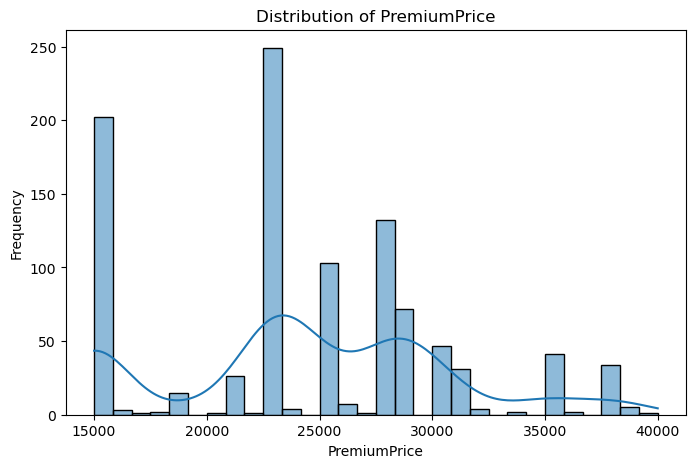

In [9]:
# Distribution of PremiumPrice
plt.figure(figsize=(8, 5))
sns.histplot(medical['PremiumPrice'], bins=30, kde=True)
plt.title('Distribution of PremiumPrice')
plt.xlabel('PremiumPrice')
plt.ylabel('Frequency')
plt.show()

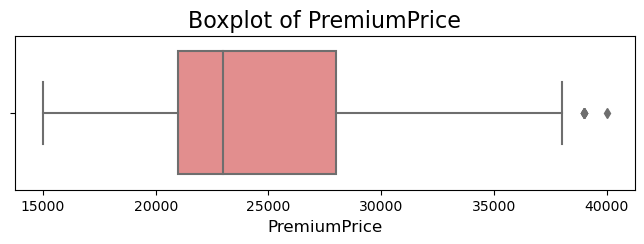

In [10]:
# Boxplot to identify outliers
plt.figure(figsize=(8, 2))
sns.boxplot(x=medical['PremiumPrice'], color='lightcoral')
plt.title('Boxplot of PremiumPrice', fontsize=16)
plt.xlabel('PremiumPrice', fontsize=12)
plt.show()

In [11]:
# Skewness and Kurtosis
skewness = stats.skew(medical['PremiumPrice'])
kurtosis = stats.kurtosis(medical['PremiumPrice'])

print(f"\nSkewness of PremiumPrice: {skewness:.2f}")
print(f"Kurtosis of PremiumPrice: {kurtosis:.2f}")


Skewness of PremiumPrice: 0.10
Kurtosis of PremiumPrice: -0.46


C:\Users\sonia\AppData\Local\Temp\ipykernel_28184\523599988.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(medical['PremiumPrice'], shade=True, color='purple')


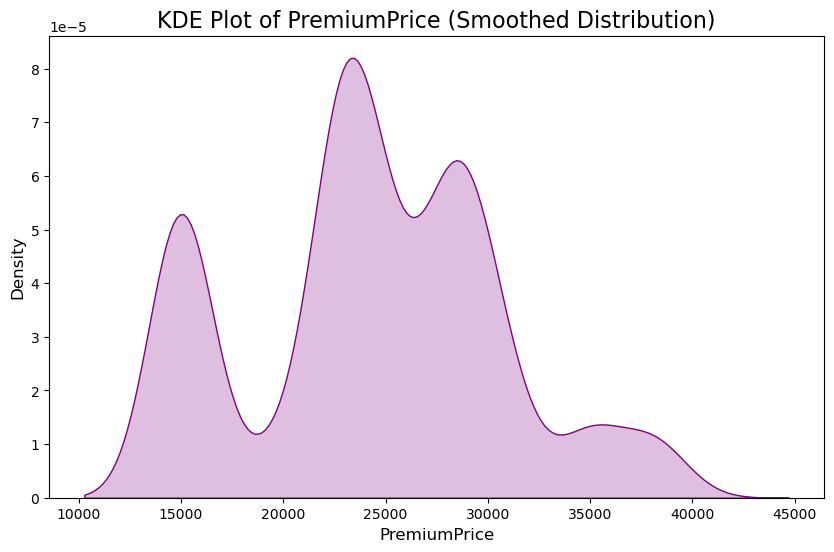

In [12]:
# Detect possible clusters with a simple Kernel Density Estimate
plt.figure(figsize=(10, 6))
sns.kdeplot(medical['PremiumPrice'], shade=True, color='purple')
plt.title('KDE Plot of PremiumPrice (Smoothed Distribution)', fontsize=16)
plt.xlabel('PremiumPrice', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

The analysis of the PremiumPrice variable reveals that it is nearly normal in distribution with a slight positive skew (Skewness: 0.10) and a flatter-than-normal peak (Kurtosis: -0.46). Peaks in the data occur around 15,000, 25,000, and 30,000, indicating possible multimodality, which could suggest distinct pricing tiers or market segments. Additionally, two high-value outliers near 40,000 were identified, which may need closer examination to determine their relevance. 

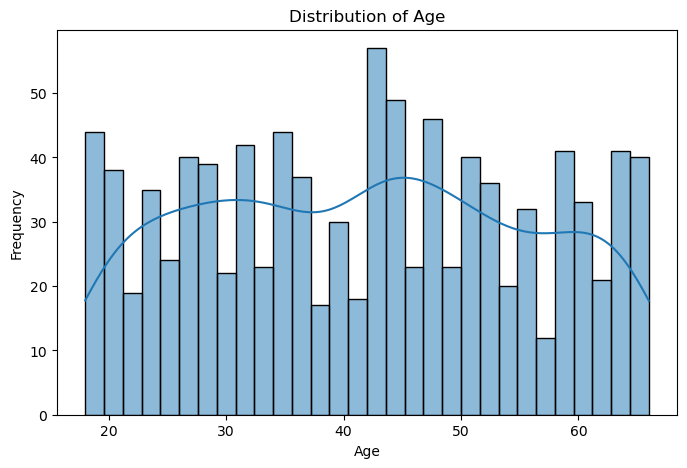

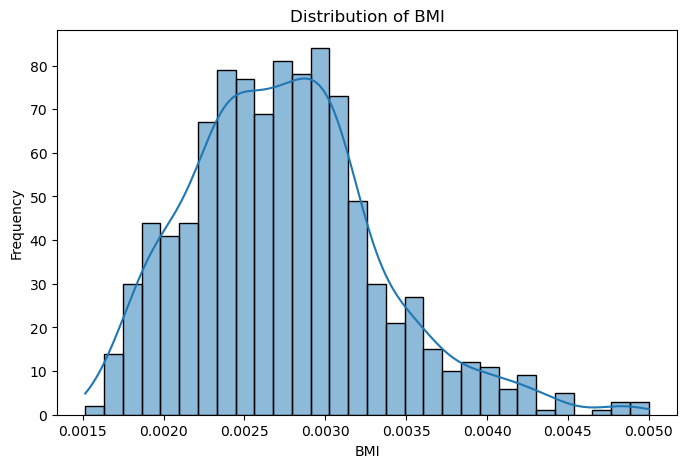

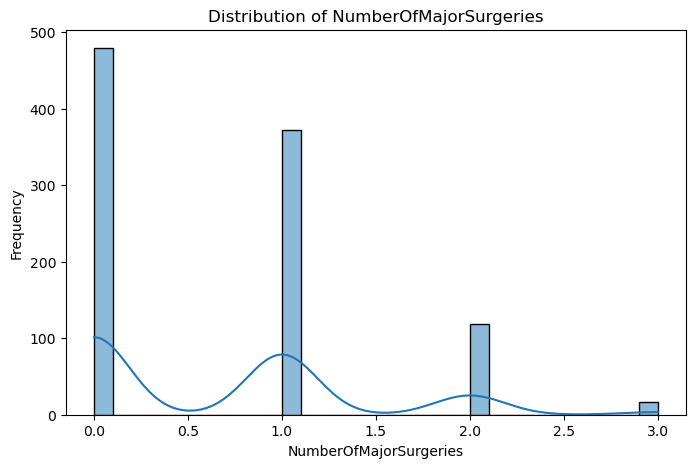

In [13]:
# Numerical variables exploration

numeric_cols = ['Age', 'BMI', 'NumberOfMajorSurgeries']

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(medical[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

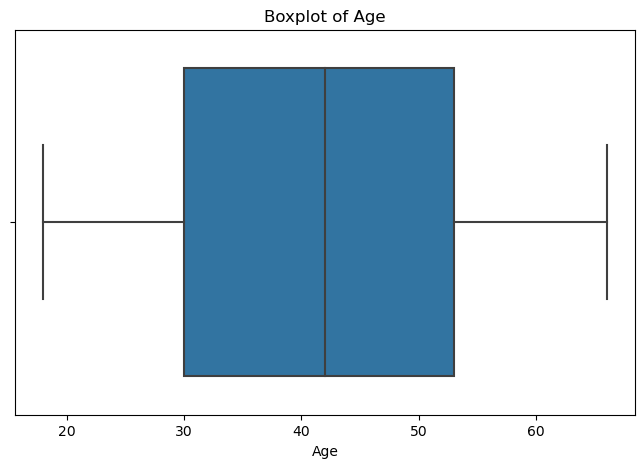

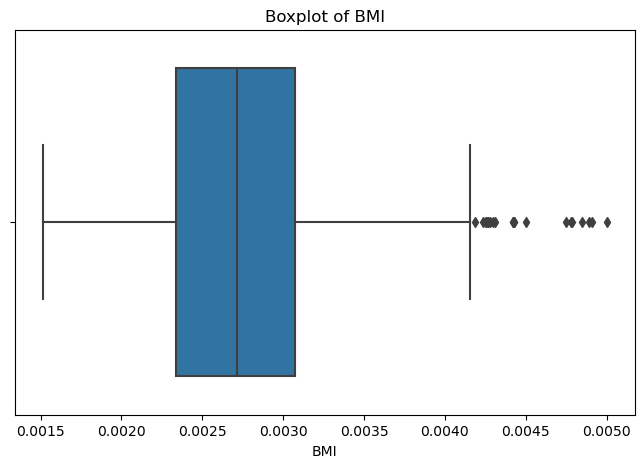

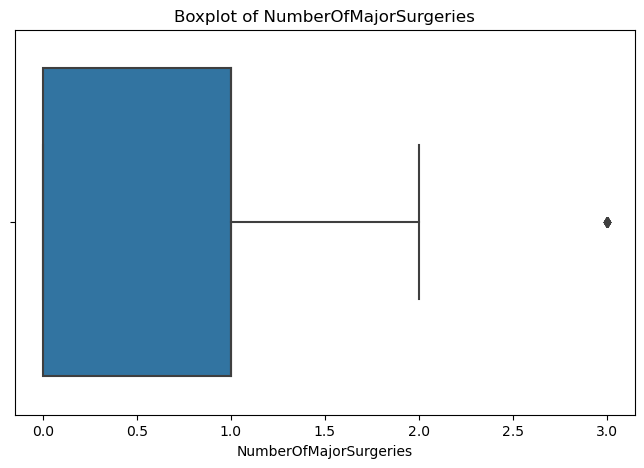

In [14]:
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=medical[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

The analysis of the numerical variables reveals diverse characteristics within the dataset. Age exhibits approximately normal distribution, with most individuals clustering around average ranges, while BMI shows a slight right-skewness with some outliers, but we are not considering taking action towards those outliers at the moment. 

The NumberOfMajorSurgeries is heavily right-skewed, dominated by individuals with zero surgeries, with rare occurrences of higher values. 

The outliers noted in Weight will be examined through the lens of correlation to see if/how Weight impacts PremiumPrice. 

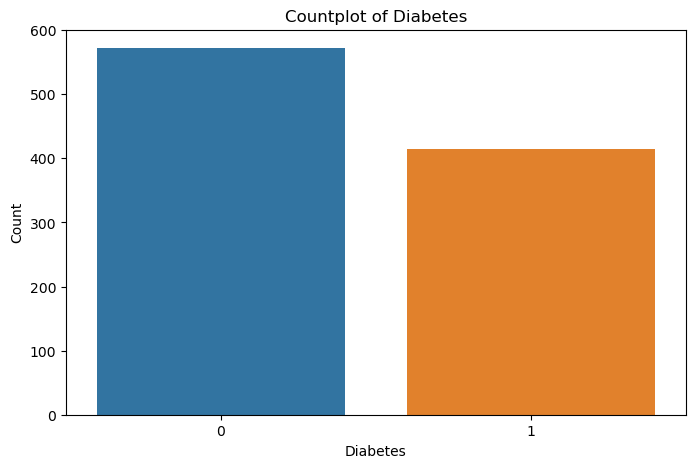

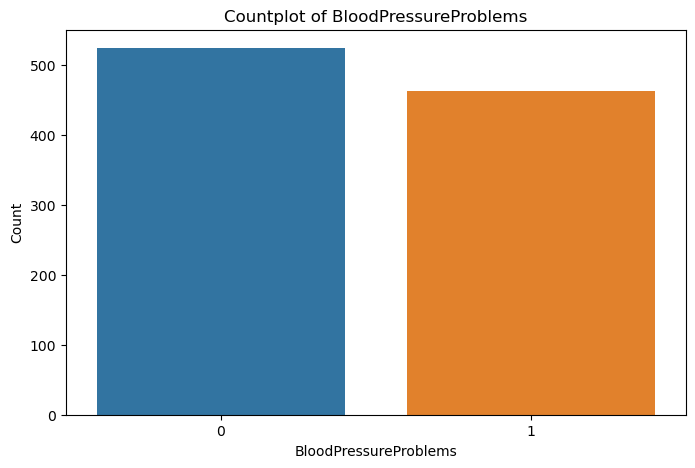

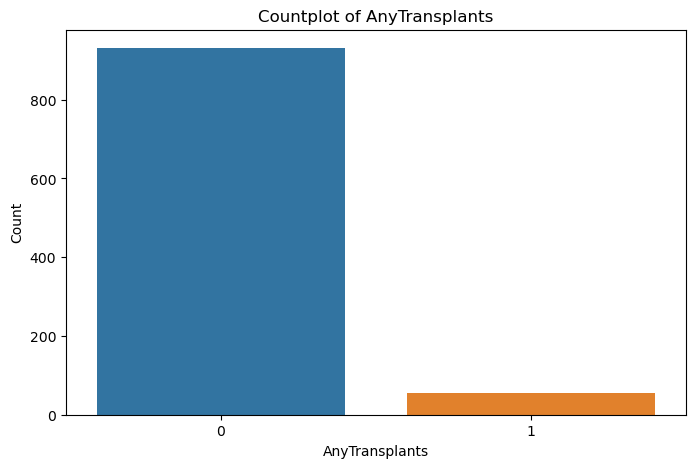

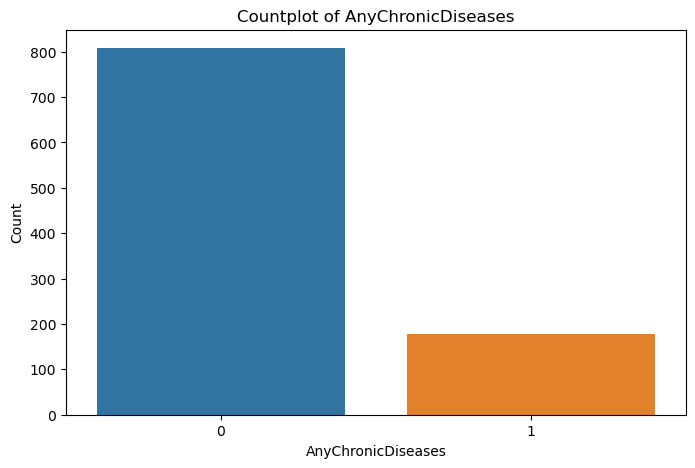

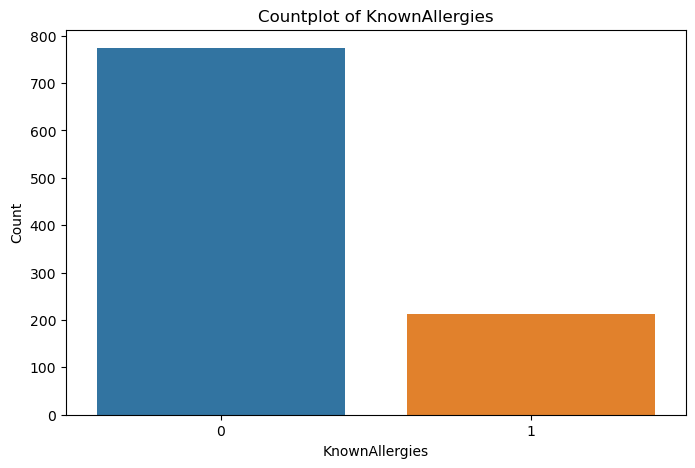

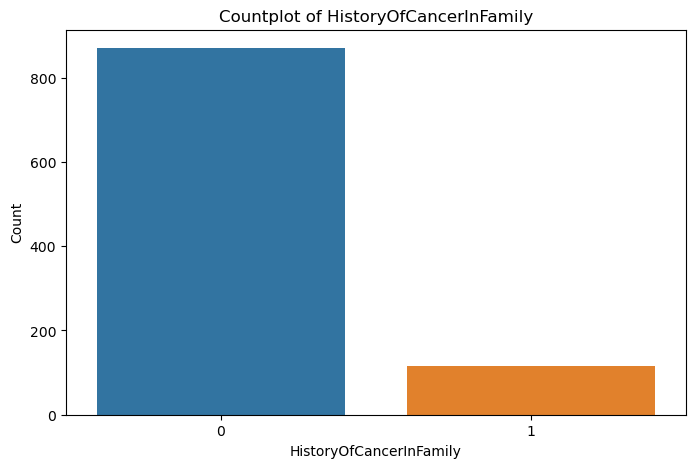

In [15]:
# Categorical variables exploration

categorical_cols = [
    'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 
    'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily'
]

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=medical[col])
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

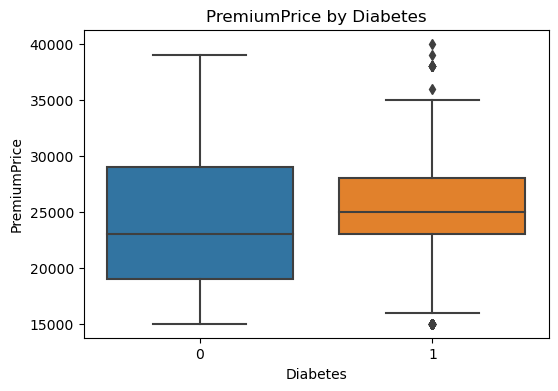

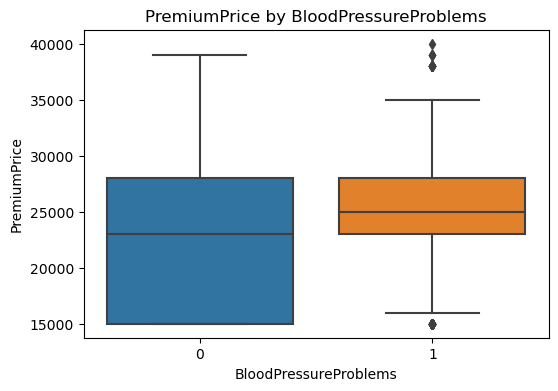

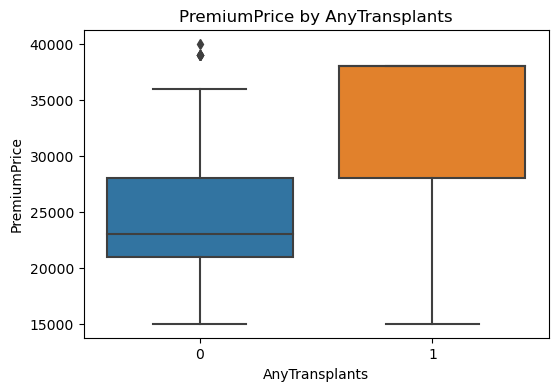

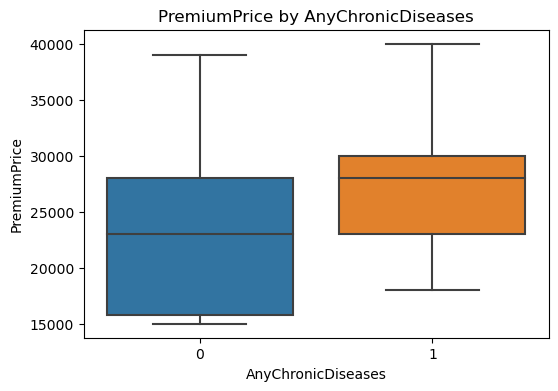

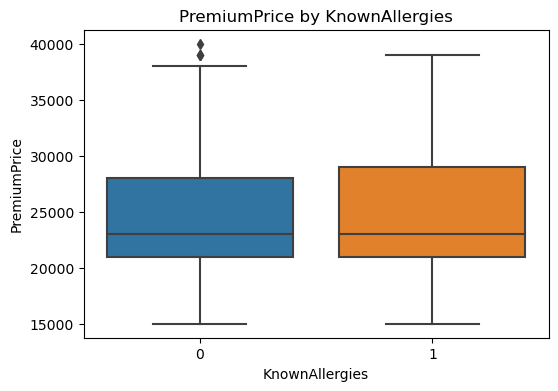

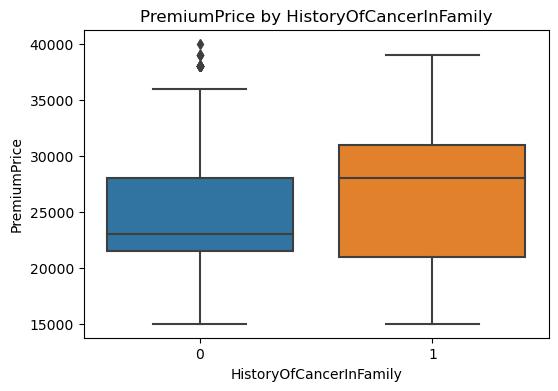

In [16]:
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=medical[col], y=medical['PremiumPrice'])
    plt.title(f'PremiumPrice by {col}')
    plt.show()

The categorical variables describe wheter an individual has a given condition or not. In the above analysis, we can see that there is a prevalence of not having the condition in all the variables, with a significant difference in distribution for all of them except for Diabetes and BloodPressureProblems.
Except for KnowAllergies, all condition variables seem to have a predictive effect on PremiumPrice as the mean PremiumPrice is higher when an individual has the condition, as shown on the boxplots.

Correlation and relationship to PremiumPrice

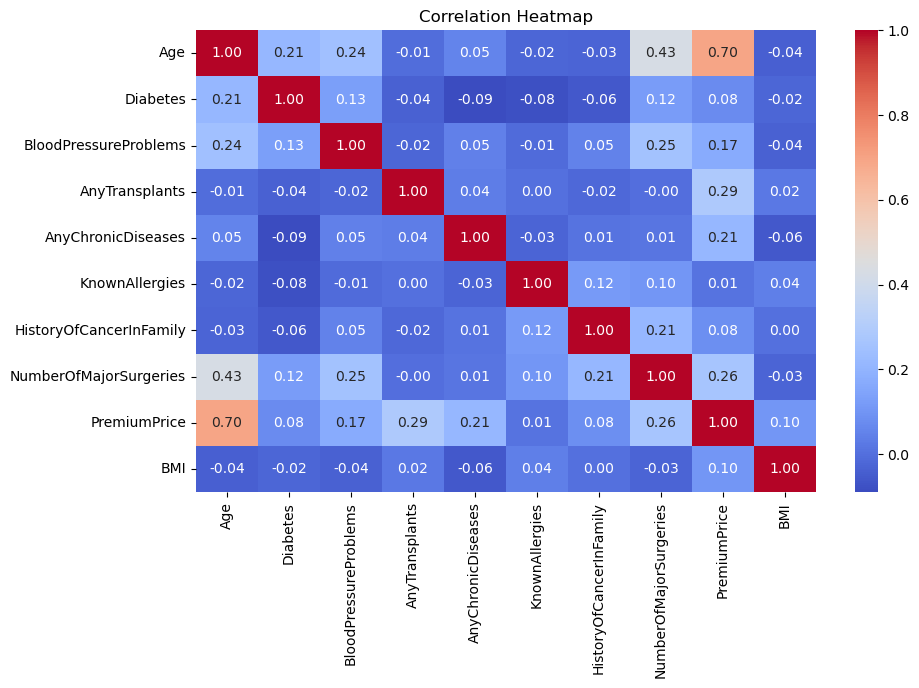

In [17]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(medical.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

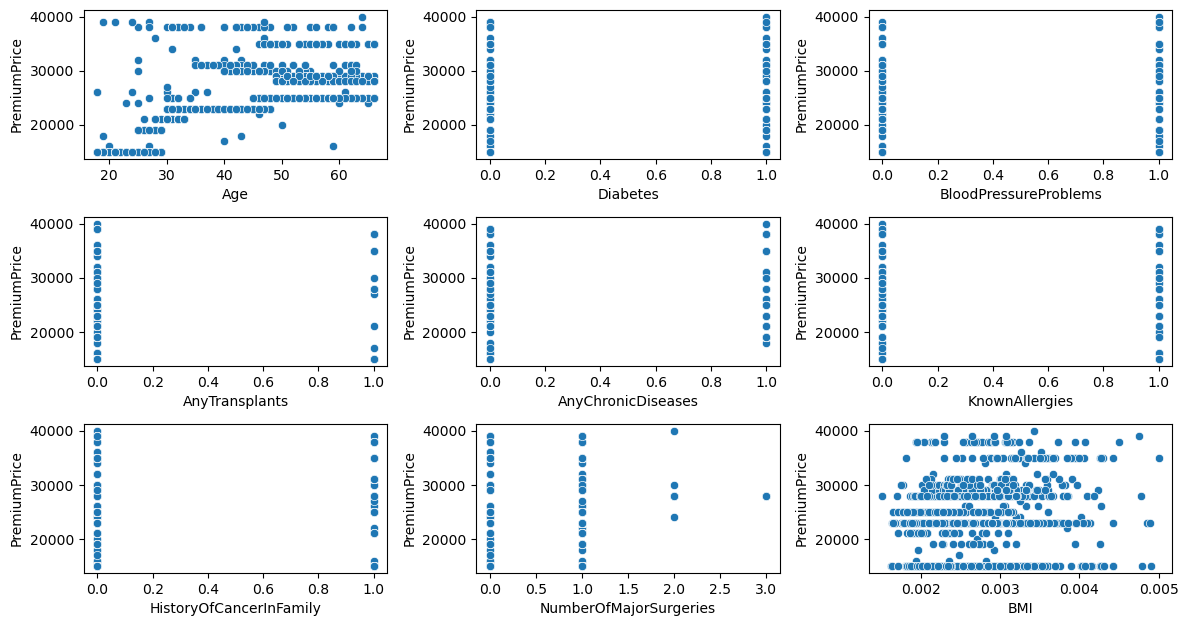

In [18]:
# Relationship between PremiumPrice and other variables
plt.figure(figsize=(12, 8))
for i, col in enumerate(medical.columns[[i for i in range(len(medical.columns)) if i != 8]]):  # Exclude PremiumPrice itself
    plt.subplot(4, 3, i+1)
    sns.scatterplot(x=medical[col], y=medical['PremiumPrice'])
    plt.xlabel(col)
    plt.ylabel('PremiumPrice')
plt.tight_layout()
plt.show()

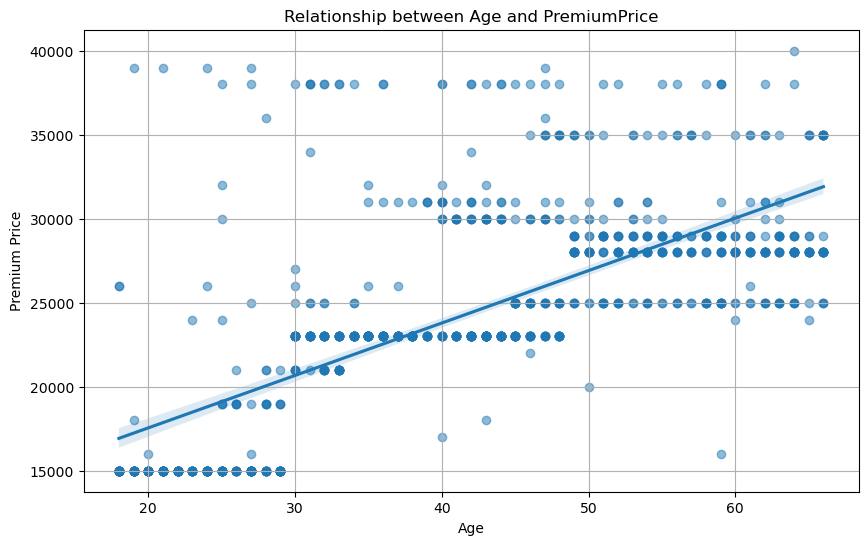

In [19]:
# Relationship between PremiumPrice and Age
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='PremiumPrice', data=medical, scatter_kws={'alpha':0.5})
plt.title('Relationship between Age and PremiumPrice')
plt.xlabel('Age')
plt.ylabel('Premium Price')
plt.grid(True)
plt.show()

The correlation matrix shows that PremiumPrice is mostly correlated to Age compared to other variables. The pairplot suports that by showing different concentrations of PremiumPrice at different Age ranges. We therefore investigated the PremiumPrice-Age relationship further, and have decided to create Age bands to group ages with similar PremiumPrice to reduce the granularity in the data. Clustering perfomed later will further guide the grouping of ages.
In the same lower granularity optic, we have decide to create a HasMajorSurgery variable to transform NumberOfMajorSurgeries into a binary variable as we have very few cases of 2 or more surgeries, and those cases' PremiumPrice is in the same range as having one major surgery.

In [20]:
# Create the 'HasMajorSurgery' column
medical['HasMajorSurgery'] = medical['NumberOfMajorSurgeries'].apply(lambda x: 1 if x >= 1 else 0)

# Quick check
print(medical[['NumberOfMajorSurgeries', 'HasMajorSurgery']].head(10))

   NumberOfMajorSurgeries  HasMajorSurgery
0                       0                0
1                       0                0
2                       1                1
3                       2                1
4                       1                1
5                       1                1
6                       0                0
7                       0                0
8                       0                0
9                       0                0


In [21]:
medical.drop(columns=['NumberOfMajorSurgeries'])
medical.head(10)

Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   
5   30         0                      0               0                   0   
6   33         0                      0               0                   0   
7   23         0                      0               0                   0   
8   48         1                      0               0                   0   
9   38         0                      0               0                   0   

   KnownAllergies  HistoryOfCancerInFamily  NumberOfMajorSurgeries  \
0               0                        0                       0   
1               0                        0                       0   
2               0                        0                       1   
3               0                        0                       2   
4               0                        0                       1   
5               1                        0                       1   
6               0                        0                       0   
7               1                        0                       0   
8               1                        0                       0   
9               0                        0                       0   

   PremiumPrice       BMI  HasMajorSurgery  
0         25000  0.002373                0  
1         29000  0.002253                0  
2         23000  0.002363                1  
3         28000  0.002777                1  
4         23000  0.003193                1  
5         23000  0.002695                1  
6         21000  0.002400                0  
7         15000  0.002411                0  
8         23000  0.002591                0  
9         23000  0.002808                0

CLUSTERING

Given the multimodal nature of PremiumPrice, we have decided to create clusters based on PremiumPrice as we suspect that there are plan designs in place that lead to different premium ranges. Clustering will help us find the optimal grouping.

In [22]:
features = medical[['PremiumPrice']]  

# Standardize the features (important for KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

C:\Users\sonia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sonia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\sonia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sonia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

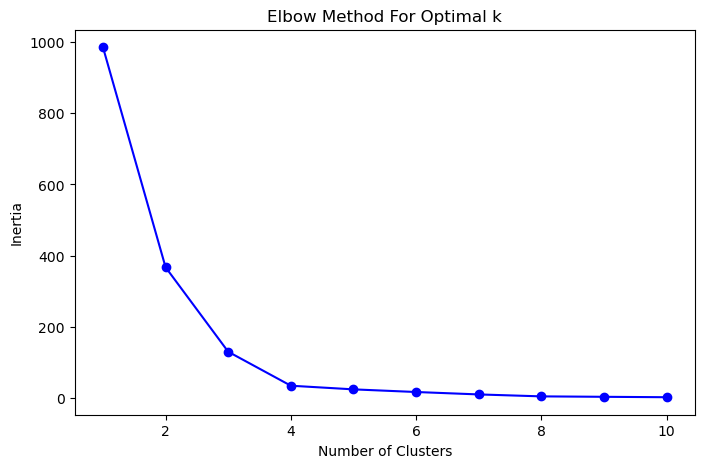

In [23]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [24]:
kmeans = KMeans(n_clusters=4, random_state=42)
medical['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\sonia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sonia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


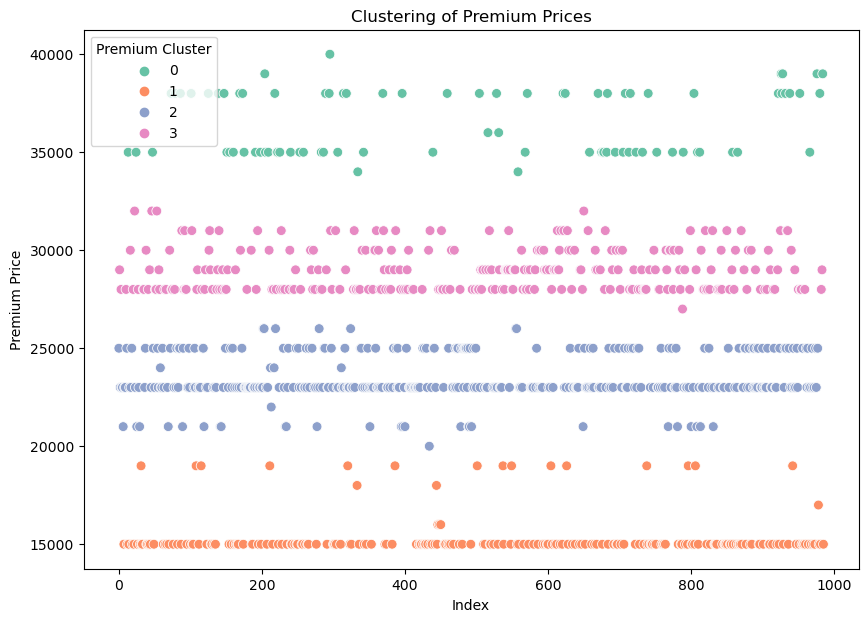

In [25]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=medical.index, y='PremiumPrice', hue='Cluster',
    data=medical, palette='Set2', s=50
)
plt.title('Clustering of Premium Prices')
plt.xlabel('Index')
plt.ylabel('Premium Price')
plt.legend(title='Premium Cluster')
plt.show()

In [26]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print(cluster_centers)

[[36494.11764706]
 [15318.38565022]
 [23447.57033248]
 [28954.70383275]]


In [27]:
medical.head()

Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   KnownAllergies  HistoryOfCancerInFamily  NumberOfMajorSurgeries  \
0               0                        0                       0   
1               0                        0                       0   
2               0                        0                       1   
3               0                        0                       2   
4               0                        0                       1   

   PremiumPrice       BMI  HasMajorSurgery  Cluster  
0         25000  0.002373                0        2  
1         29000  0.002253                0        3  
2         23000  0.002363                1        2  
3         28000  0.002777                1        3  
4         23000  0.003193                1        2

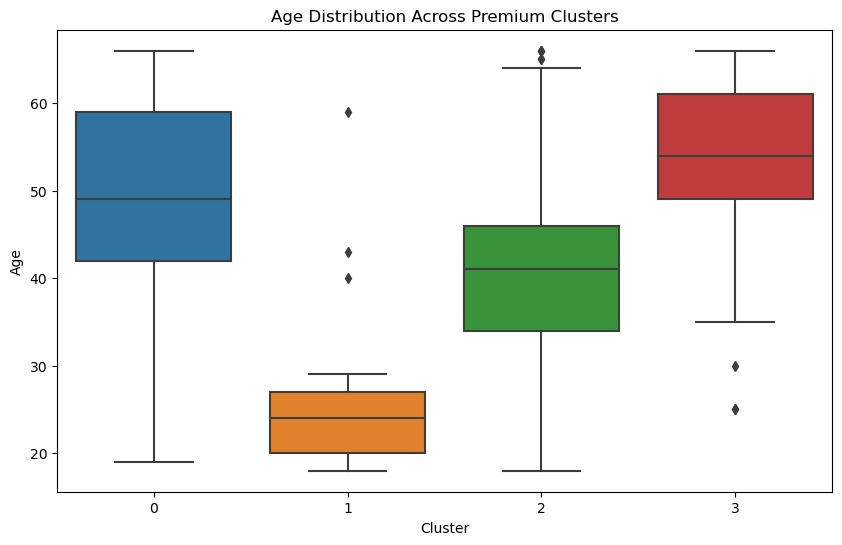

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(data=medical, x='Cluster', y='Age')
plt.title('Age Distribution Across Premium Clusters')
plt.show()

In [29]:
summary = medical.groupby('Cluster').agg(['mean'])
print(summary)

               Age  Diabetes BloodPressureProblems AnyTransplants  \
              mean      mean                  mean           mean   
Cluster                                                             
0        48.729412  0.364706              0.470588       0.423529   
1        23.744395  0.322870              0.295964       0.049327   
2        41.531969  0.419437              0.480818       0.002558   
3        53.954704  0.512195              0.585366       0.024390   

        AnyChronicDiseases KnownAllergies HistoryOfCancerInFamily  \
                      mean           mean                    mean   
Cluster                                                             
0                 0.247059       0.247059                0.129412   
1                 0.071749       0.224215                0.125561   
2                 0.168798       0.209719                0.066496   
3                 0.261324       0.205575                0.177700   

        NumberOfMajorSurgeries  

In [30]:
for cluster in sorted(medical['Cluster'].unique()):
    print(f"\nCluster {cluster} Correlations:")
    cluster_corr = medical[medical['Cluster'] == cluster].corr()
    print(cluster_corr['PremiumPrice'].sort_values(ascending=False))


Cluster 0 Correlations:
PremiumPrice               1.000000
AnyTransplants             0.705153
AnyChronicDiseases         0.110986
NumberOfMajorSurgeries     0.024424
HistoryOfCancerInFamily   -0.009372
HasMajorSurgery           -0.025183
BloodPressureProblems     -0.025551
KnownAllergies            -0.073334
Diabetes                  -0.109869
BMI                       -0.333669
Age                       -0.521109
Cluster                         NaN
Name: PremiumPrice, dtype: float64

Cluster 1 Correlations:
PremiumPrice               1.000000
AnyChronicDiseases         0.965091
Age                        0.288166
BloodPressureProblems      0.084676
NumberOfMajorSurgeries     0.016880
HasMajorSurgery            0.016880
BMI                       -0.002711
KnownAllergies            -0.019793
AnyTransplants            -0.029838
Diabetes                  -0.063691
HistoryOfCancerInFamily   -0.102739
Cluster                         NaN
Name: PremiumPrice, dtype: float64

Cluster 2 Corre

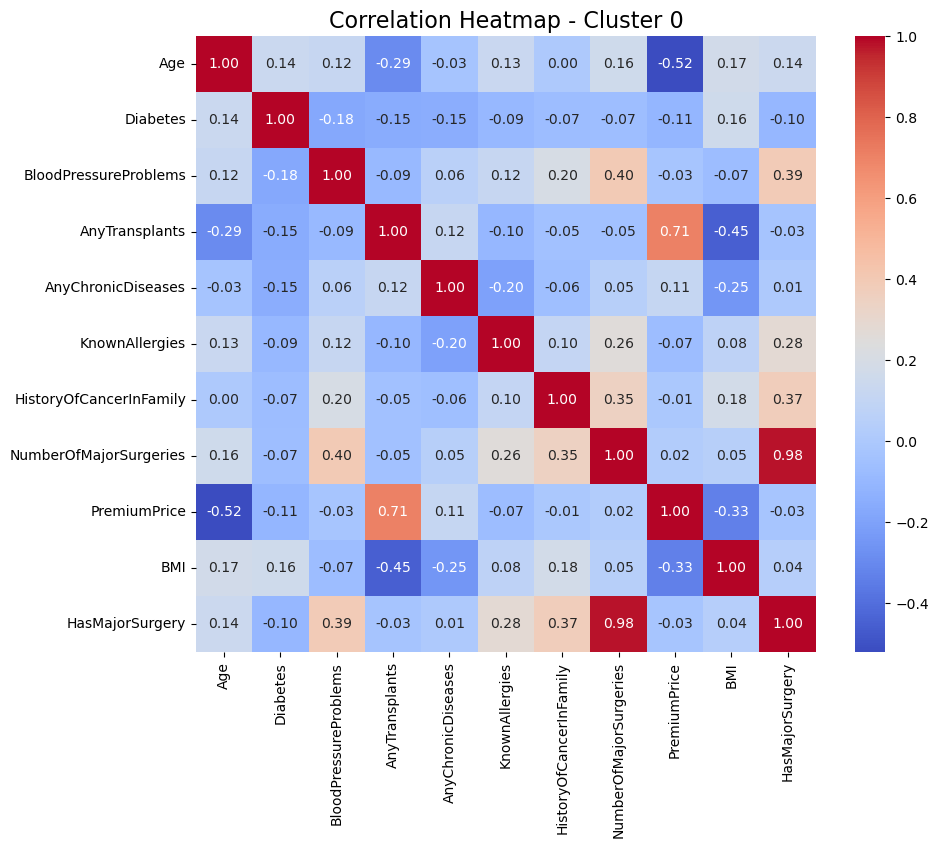

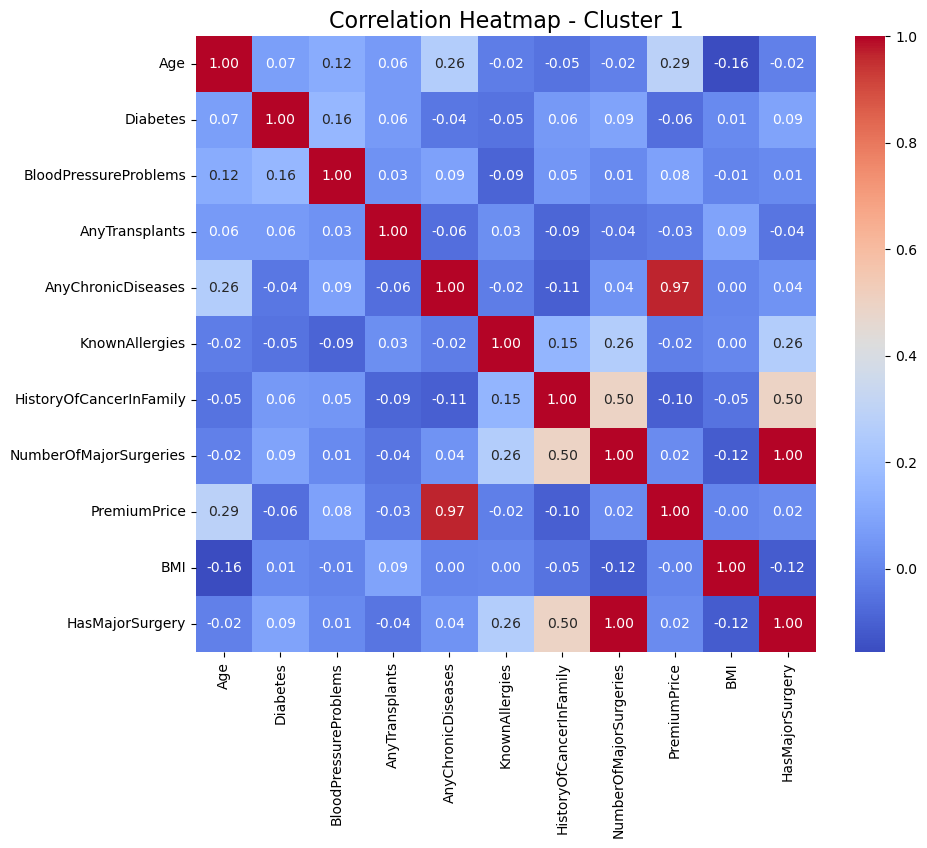

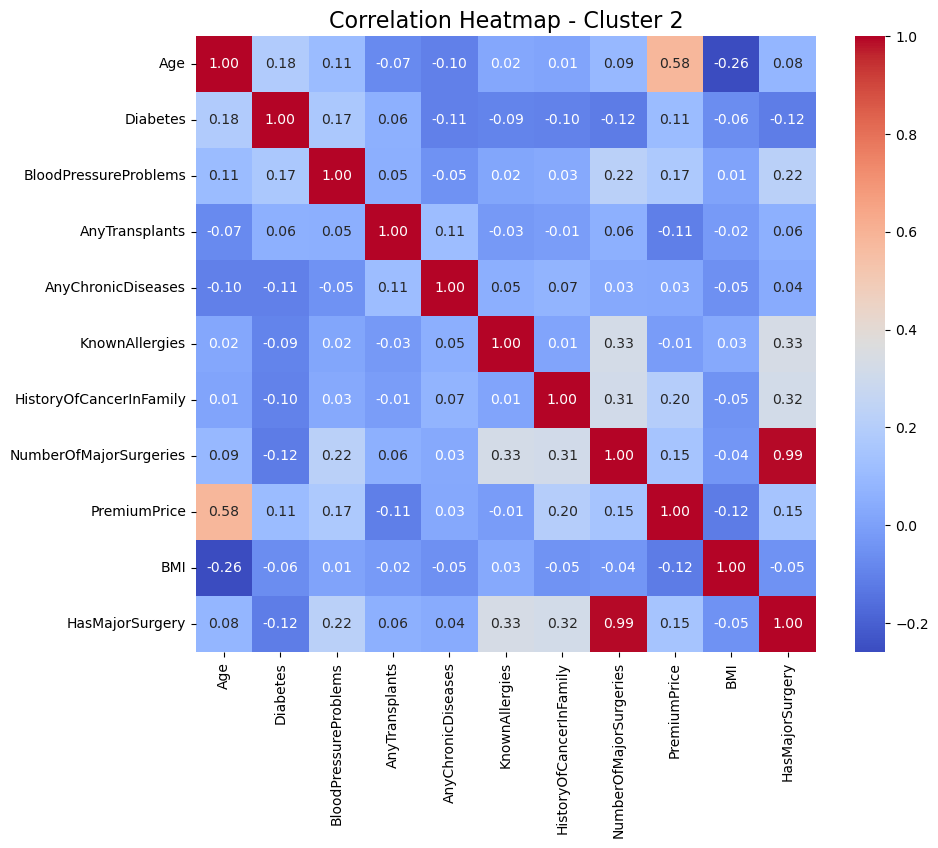

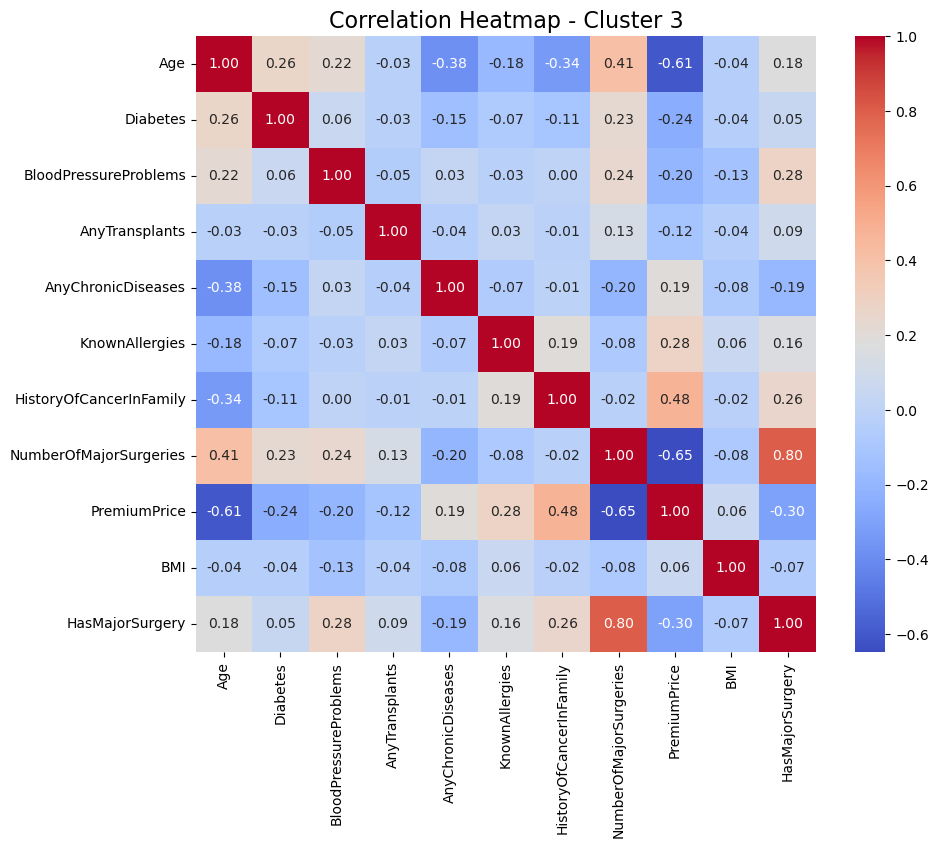

In [31]:
vars_to_corr = [col for col in medical.columns if col != 'Cluster']
for cluster in sorted(medical['Cluster'].unique()):
    cluster_data = medical[medical['Cluster'] == cluster]
    corr = cluster_data[vars_to_corr].corr()

    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Heatmap - Cluster {cluster}', fontsize=16)
    plt.show()

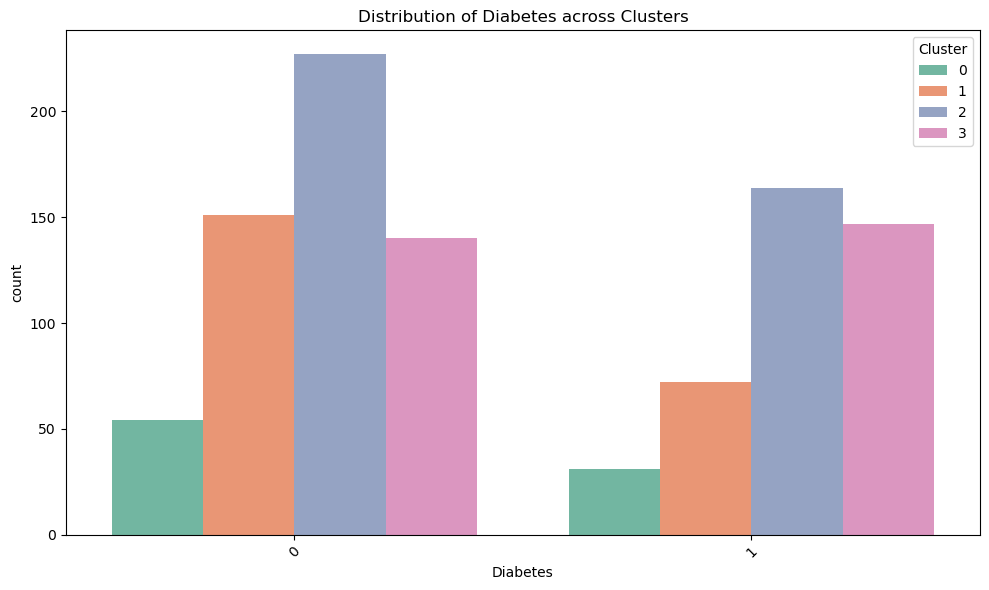

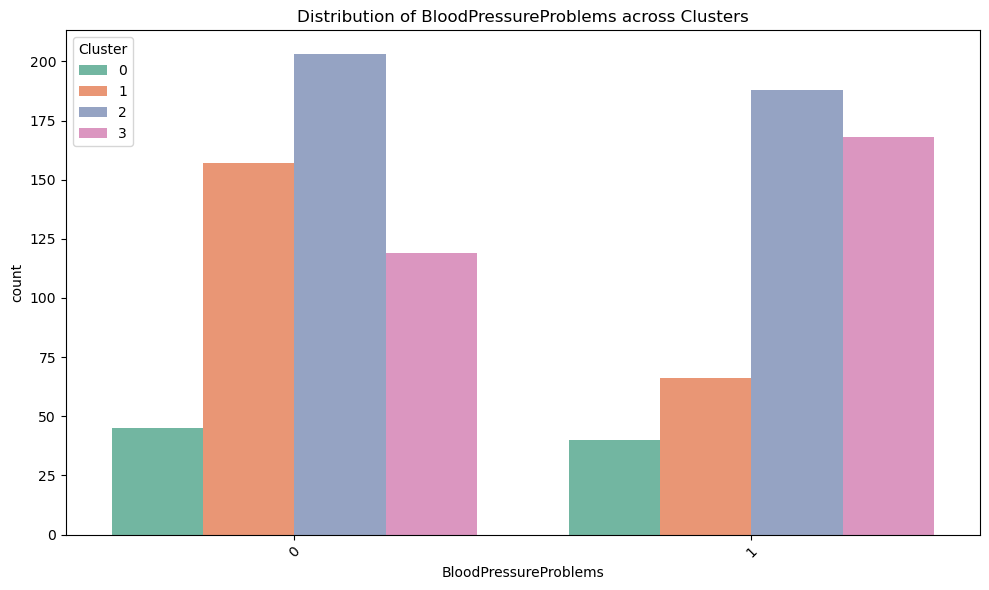

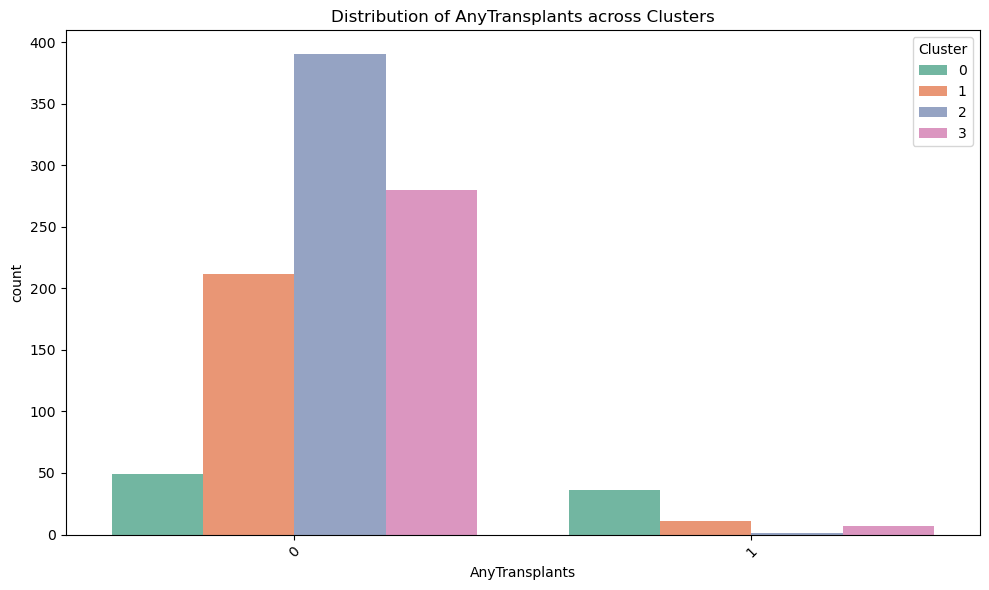

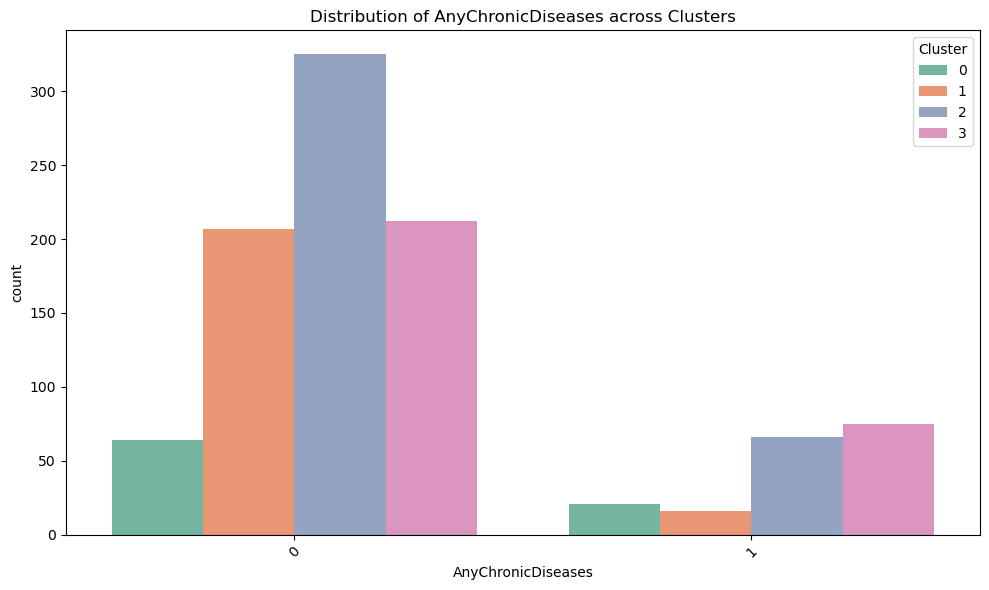

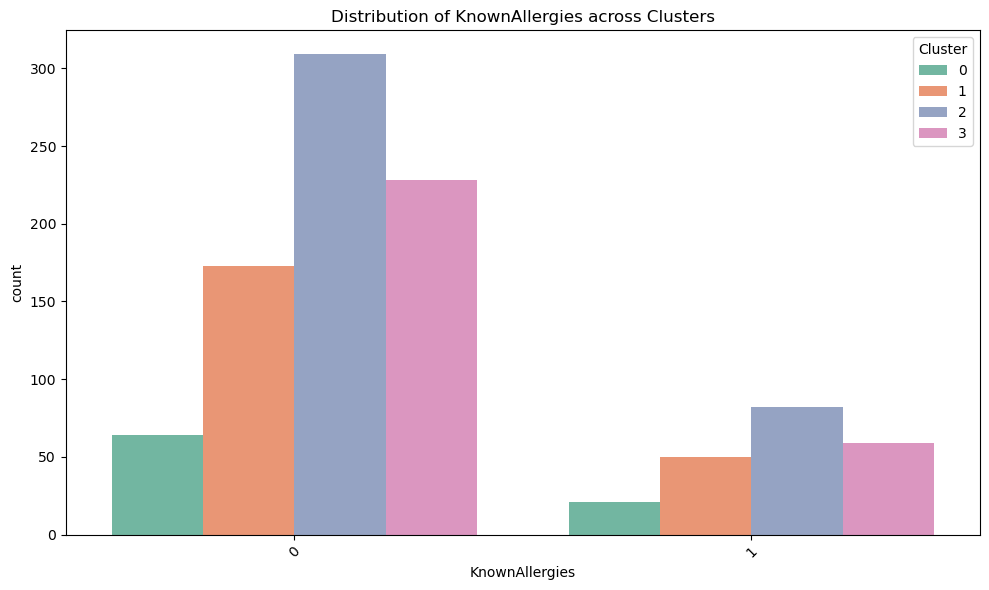

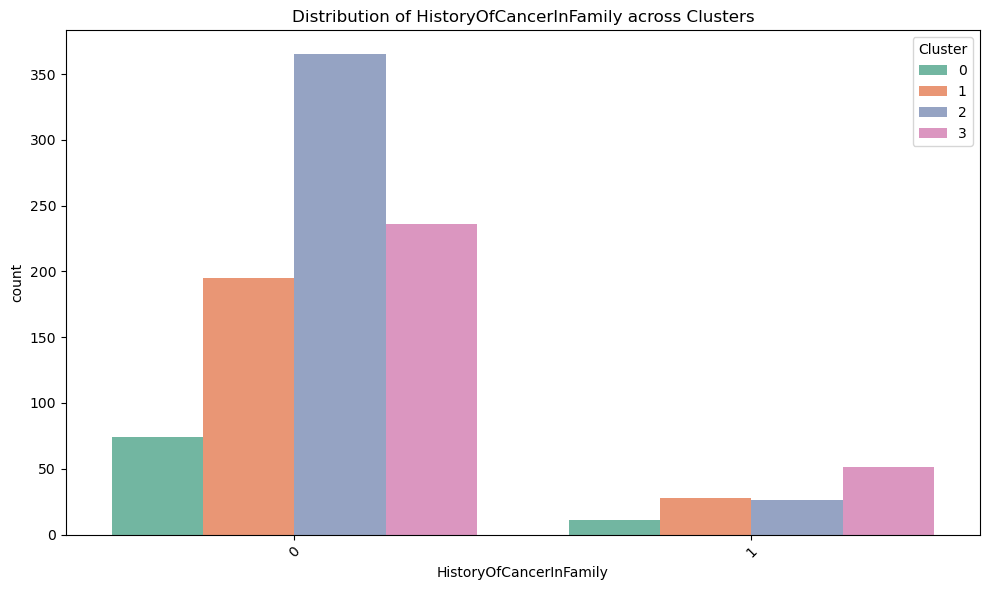

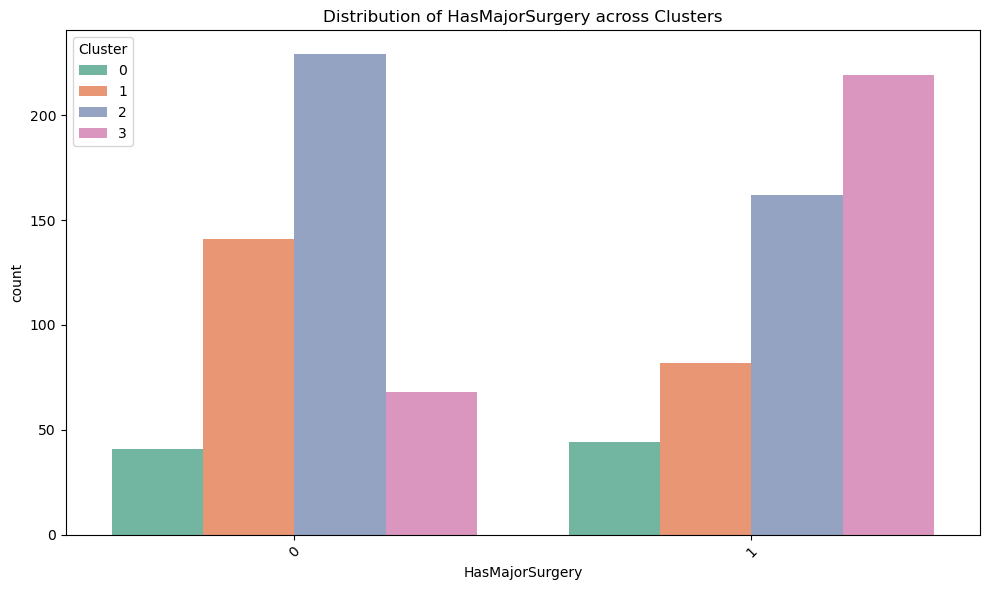

In [32]:
categorical_cols = [
    'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 
    'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily', 'HasMajorSurgery'
]

for var in categorical_cols:
    plt.figure(figsize=(10,6))
    sns.countplot(data=medical, x=var, hue='Cluster', palette='Set2')
    plt.title(f'Distribution of {var} across Clusters')
    plt.xticks(rotation=45)
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()

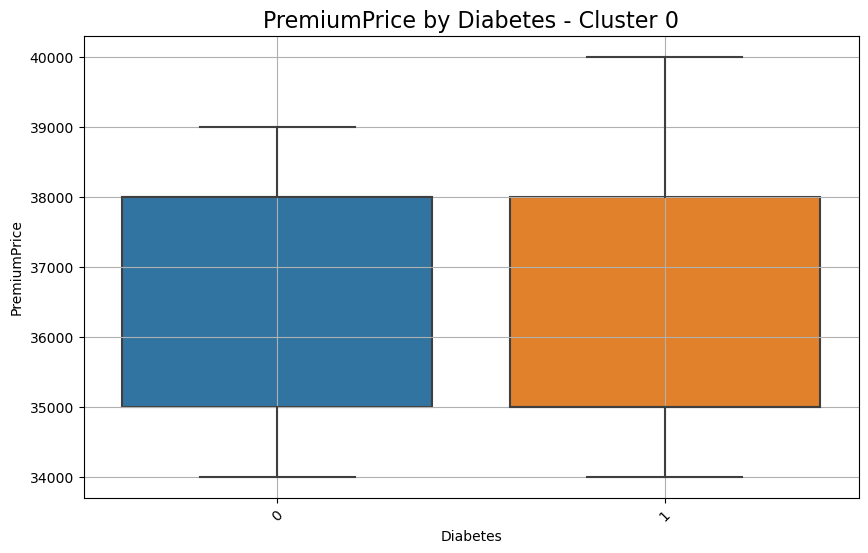

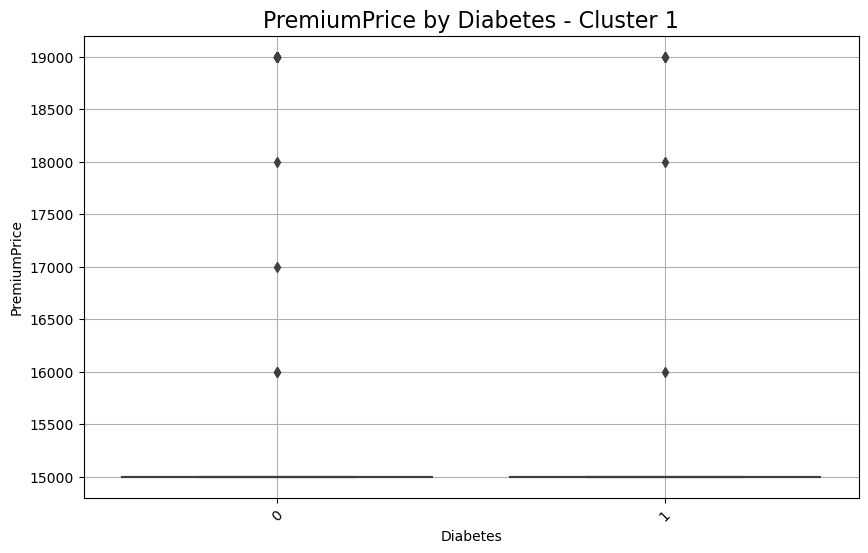

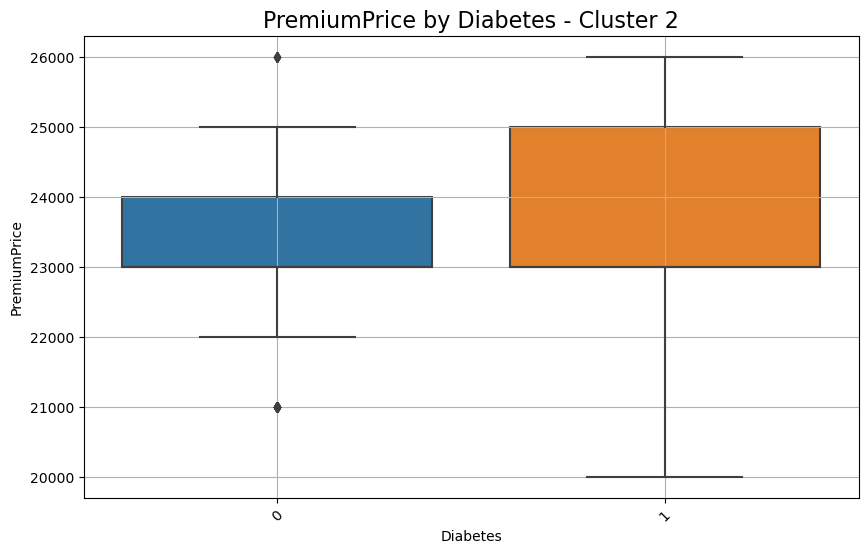

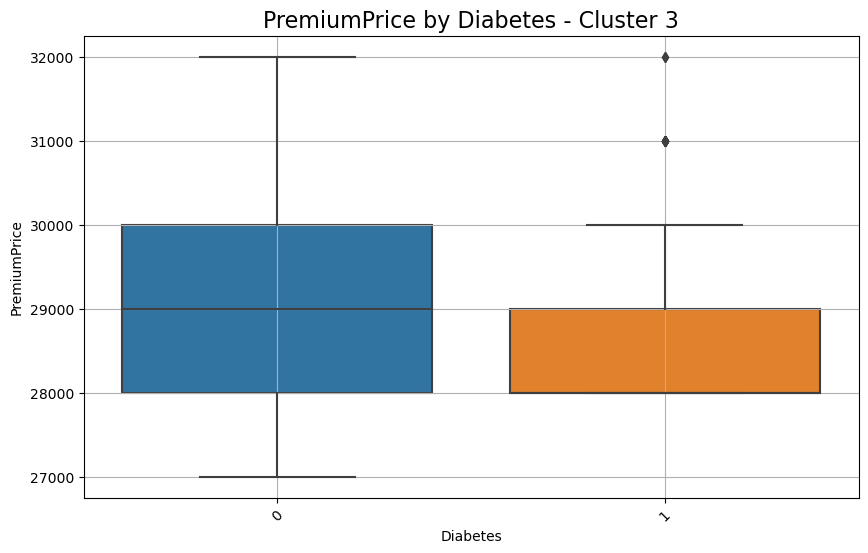

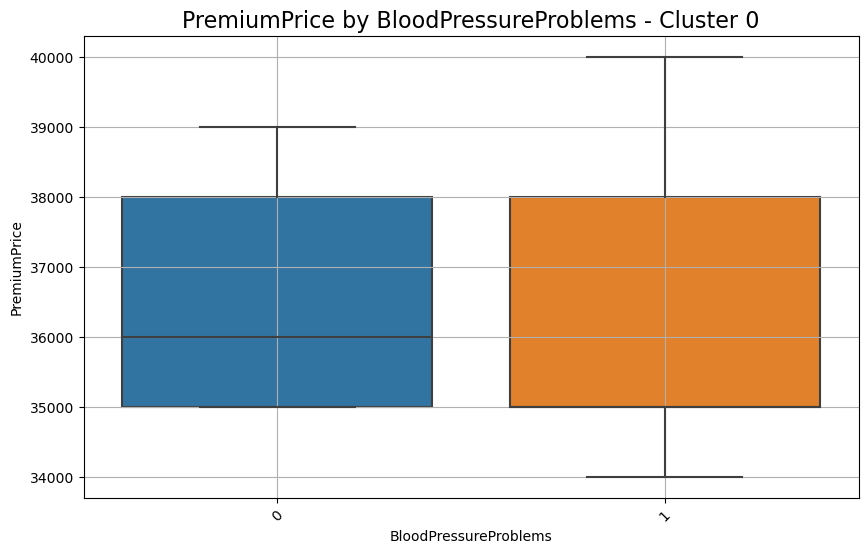

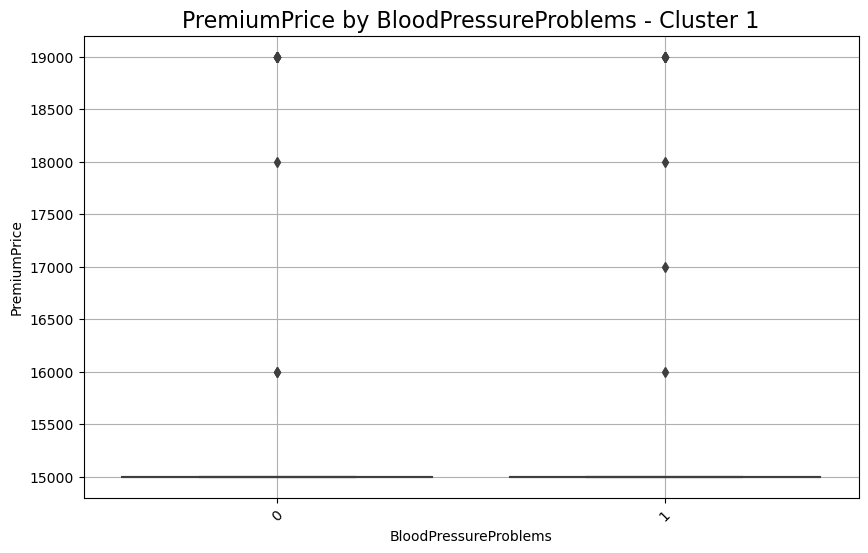

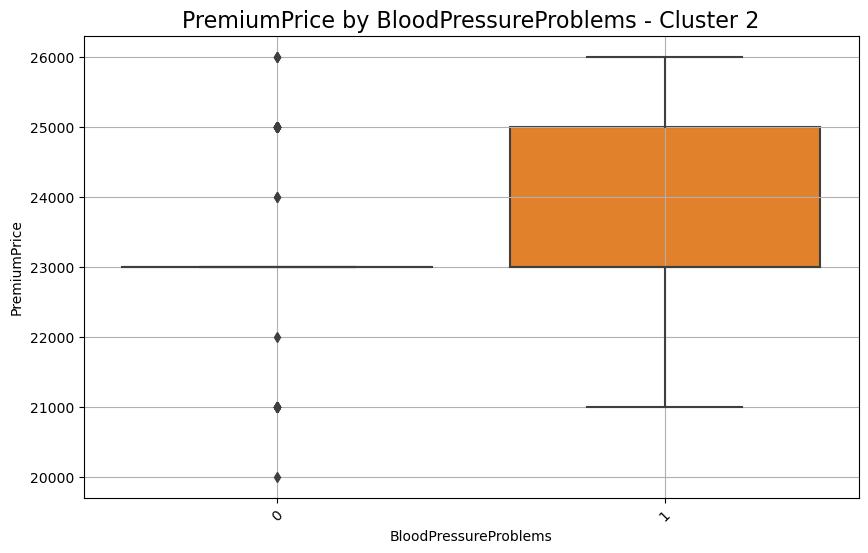

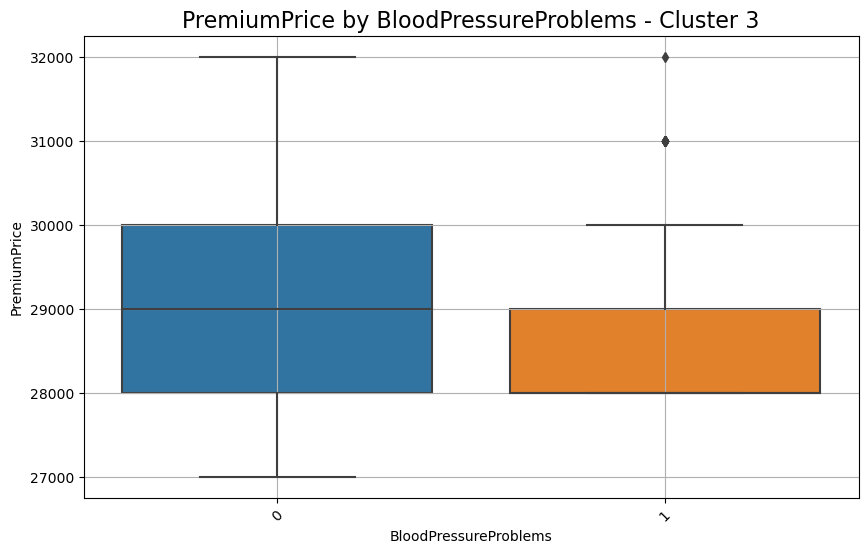

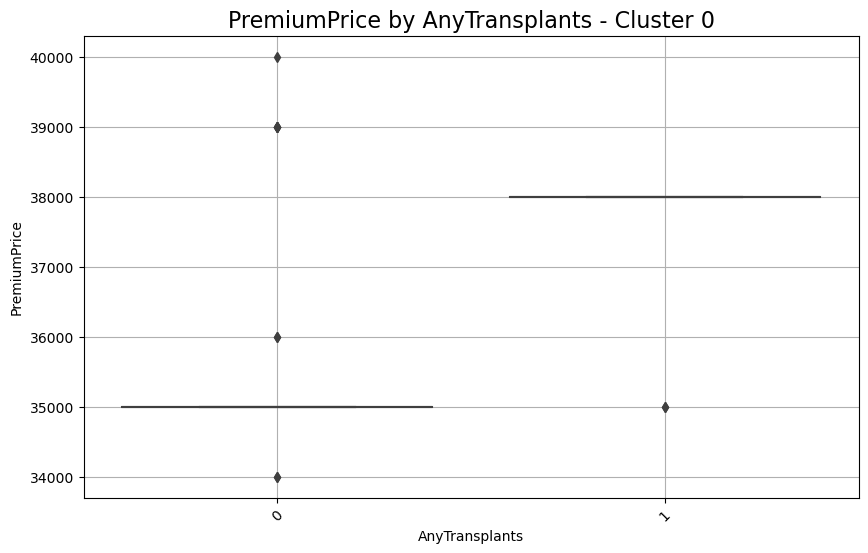

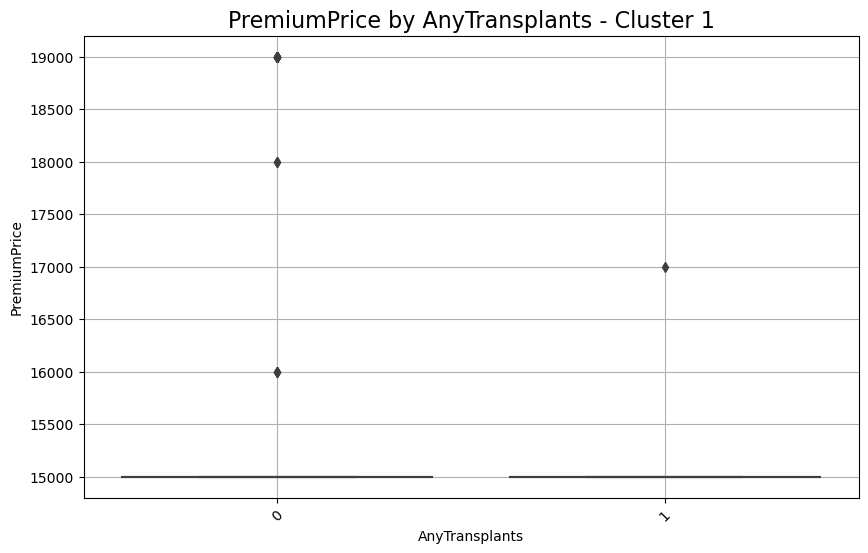

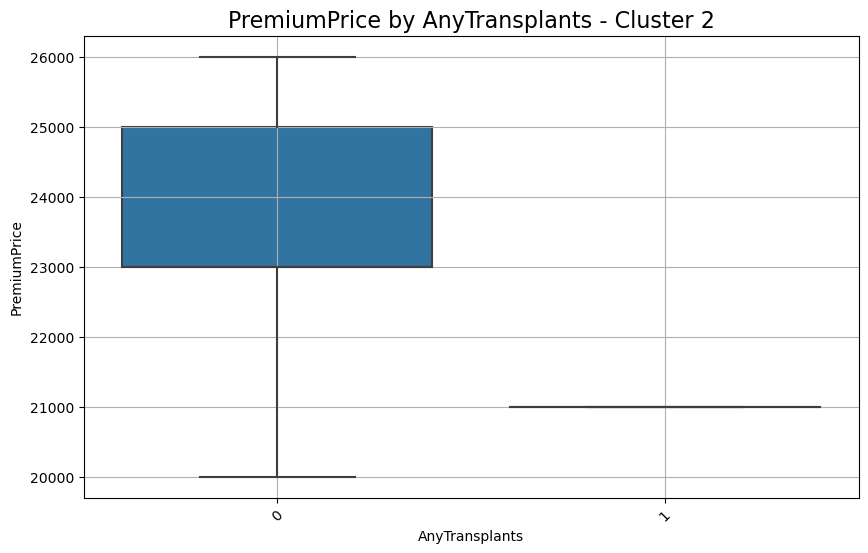

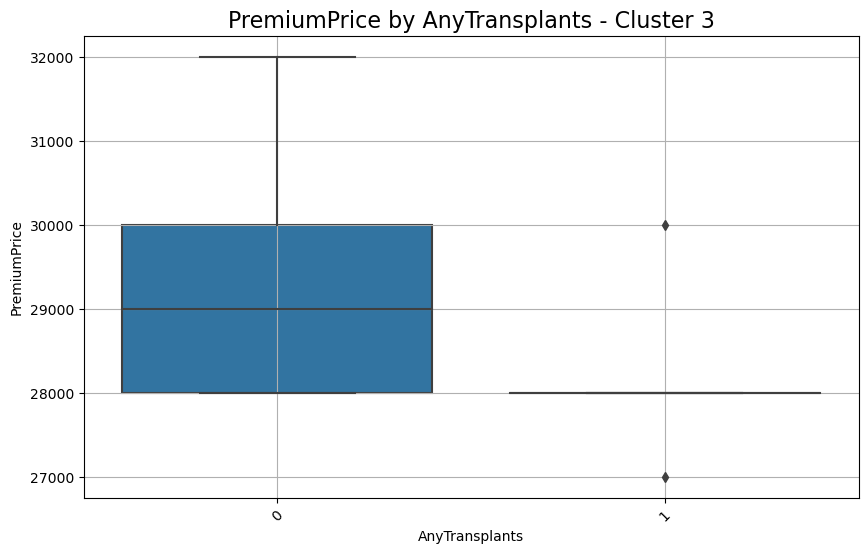

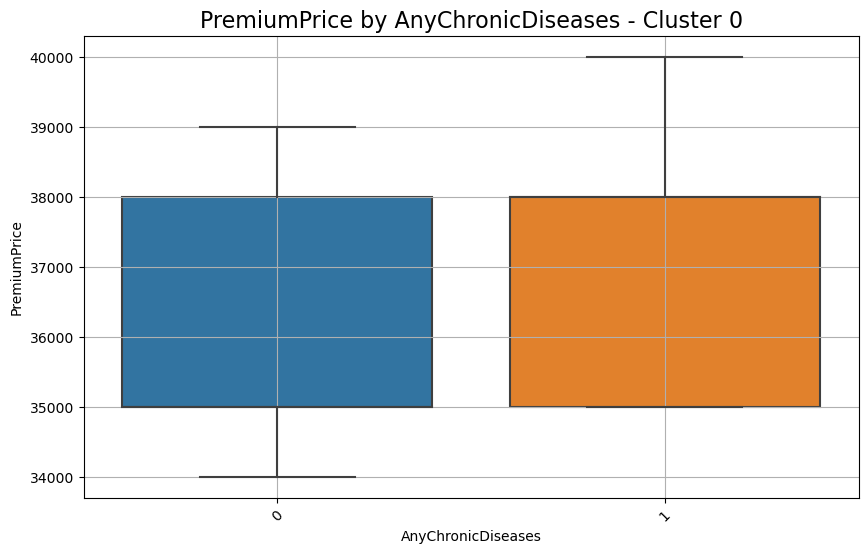

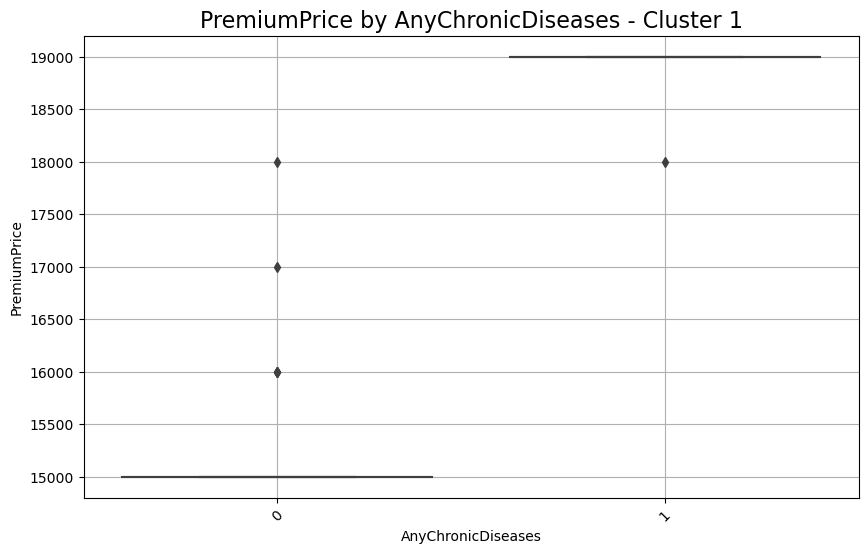

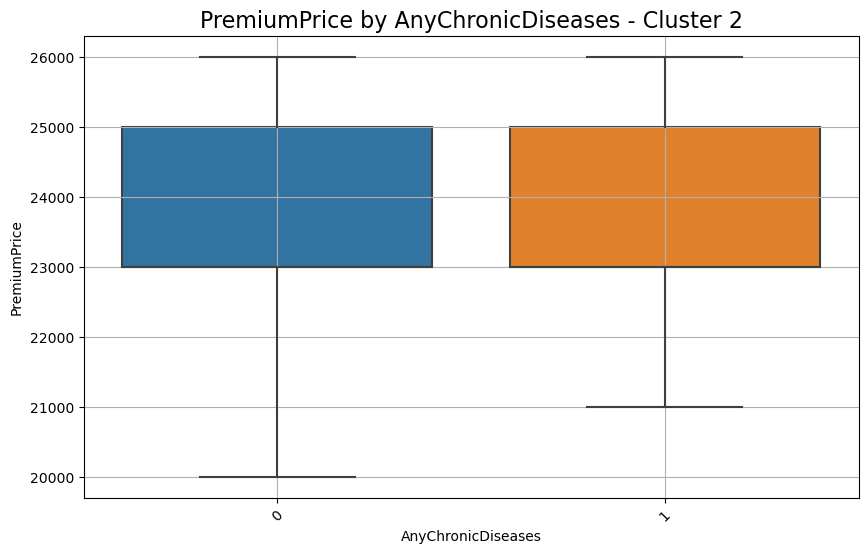

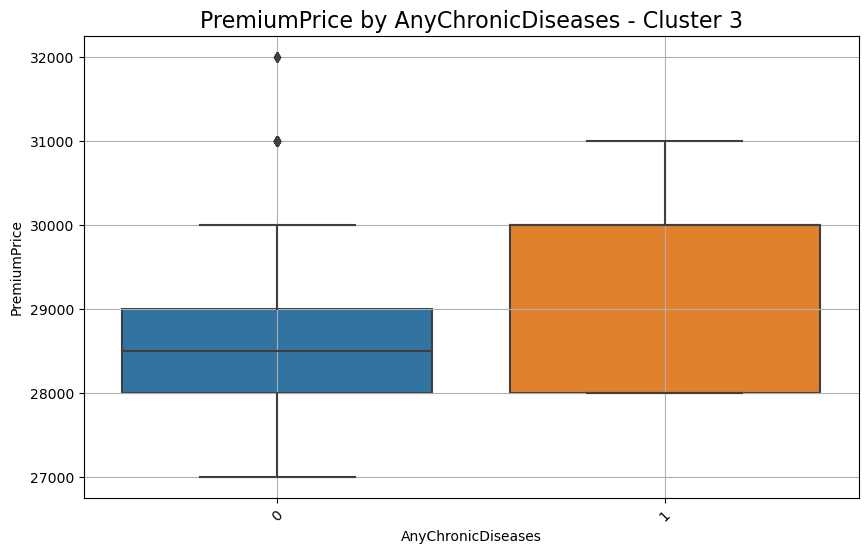

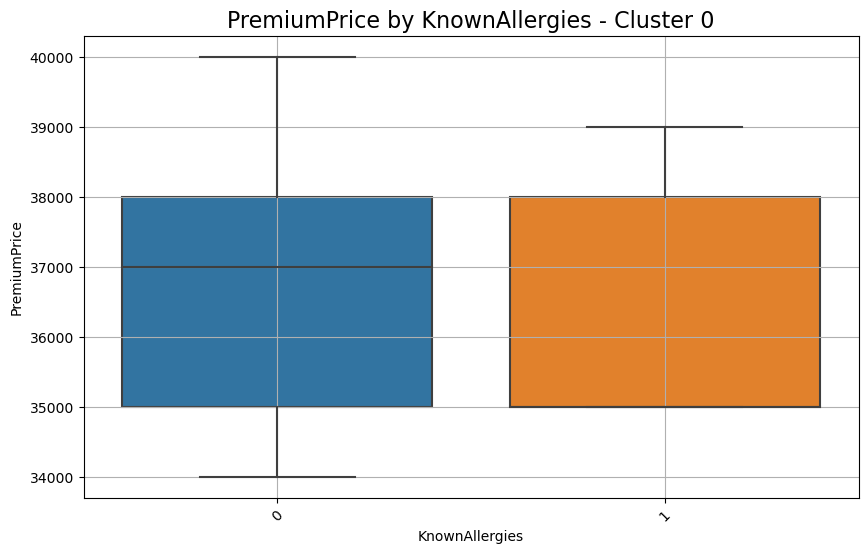

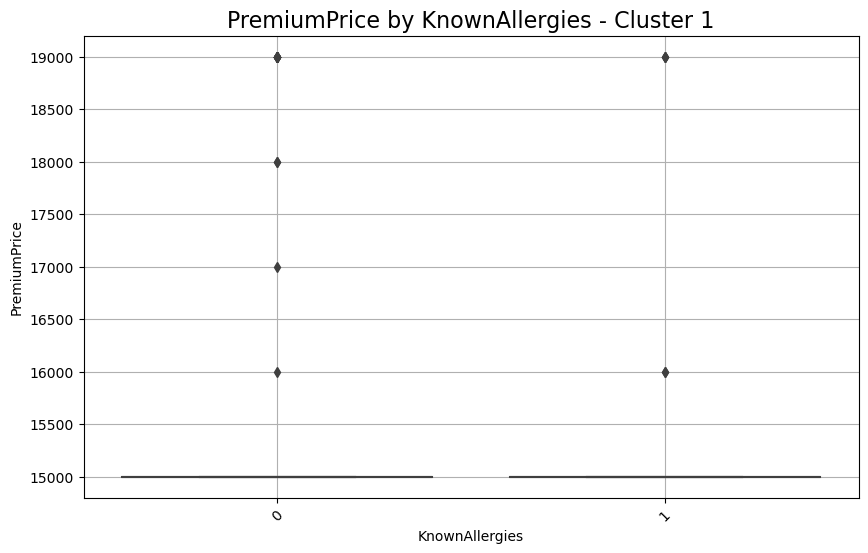

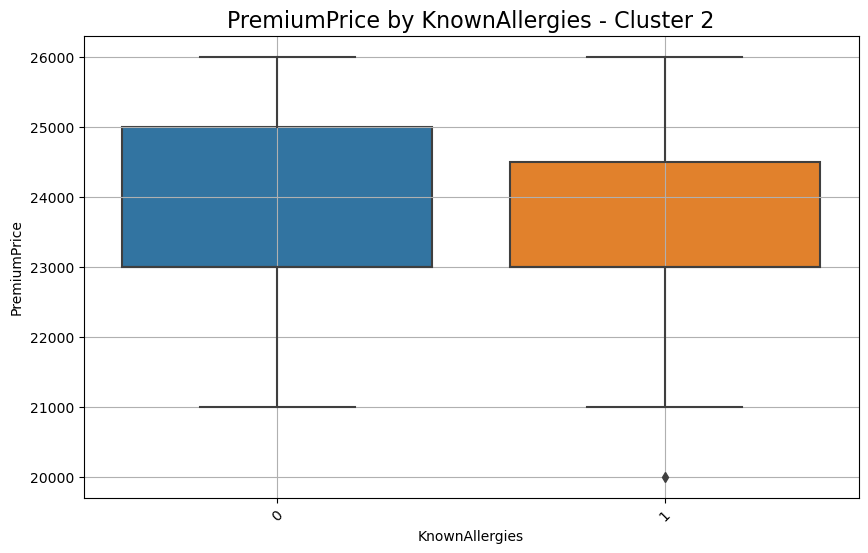

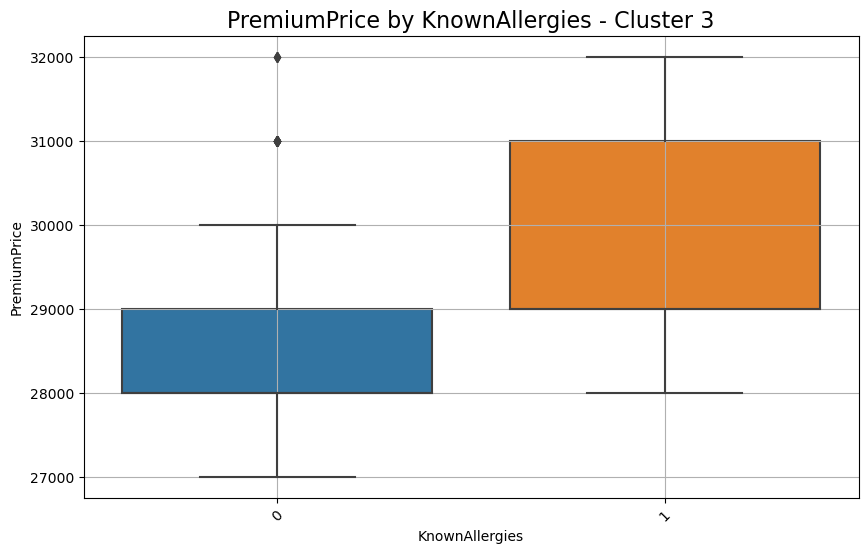

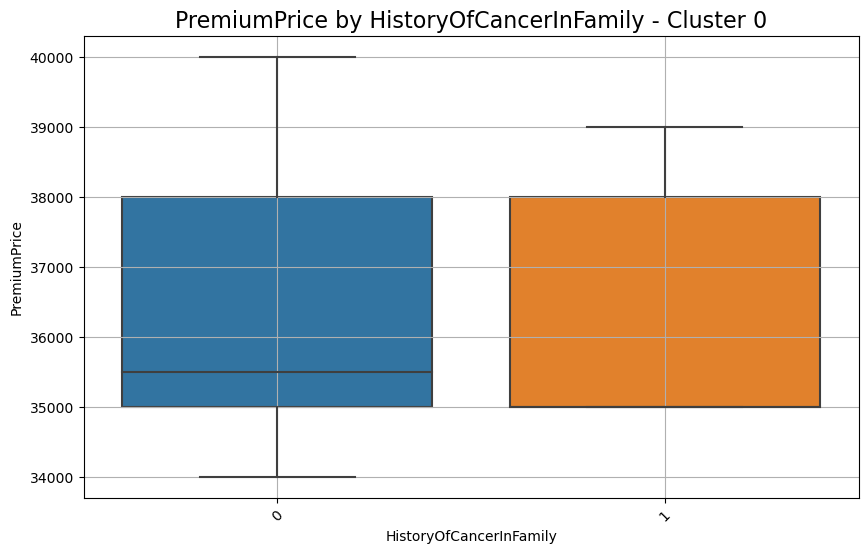

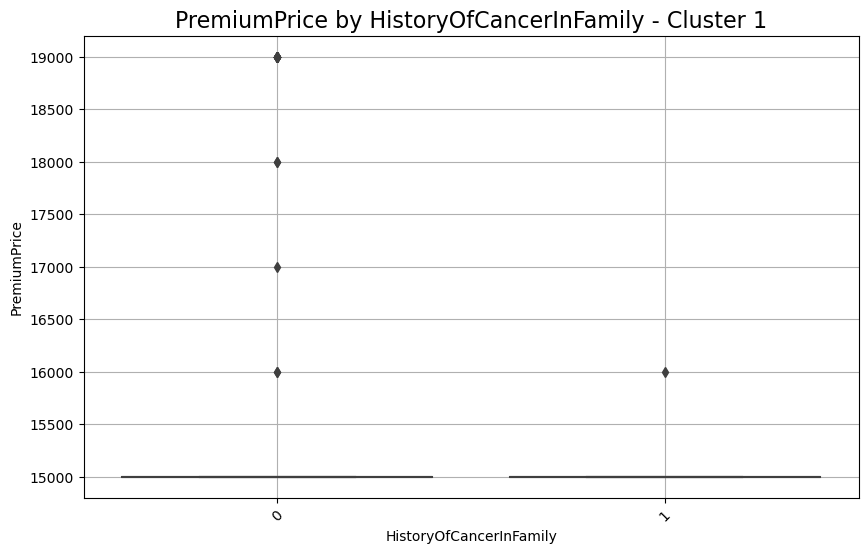

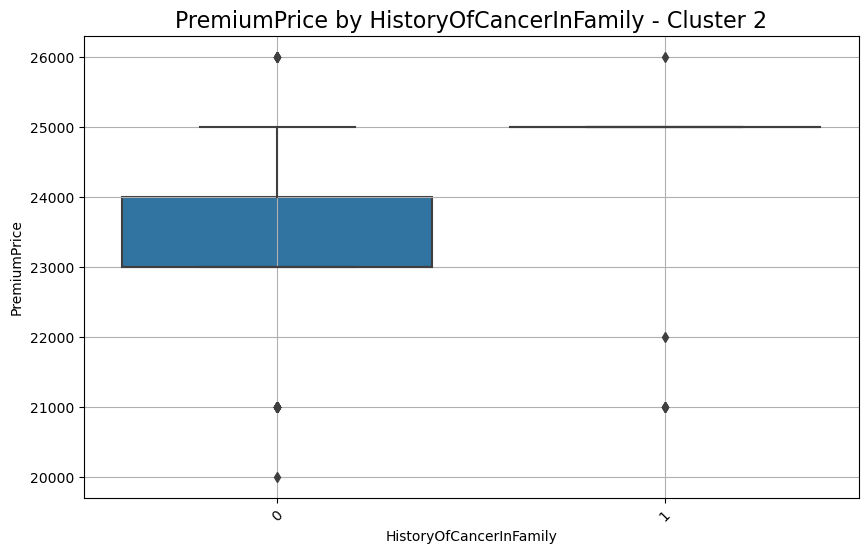

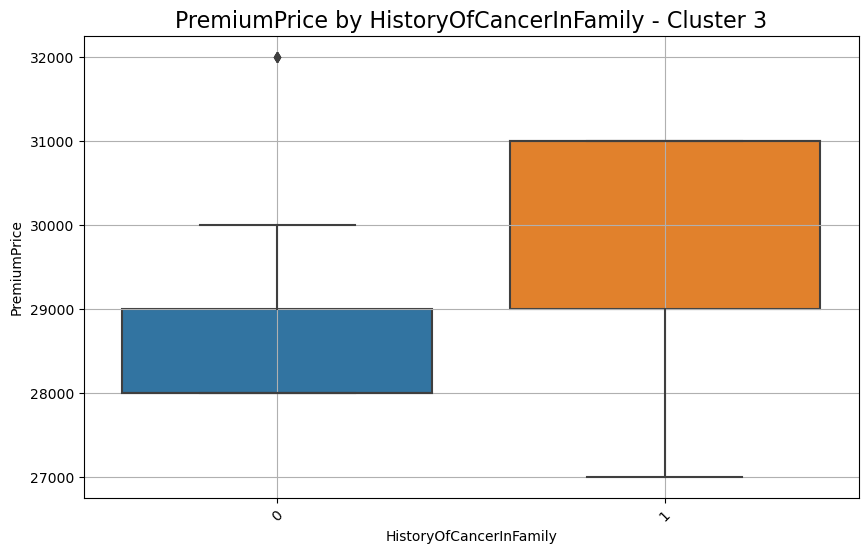

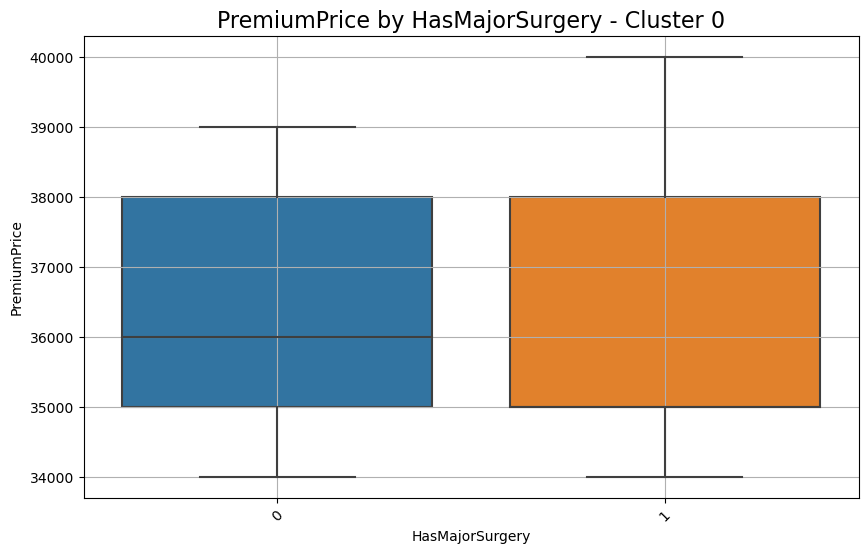

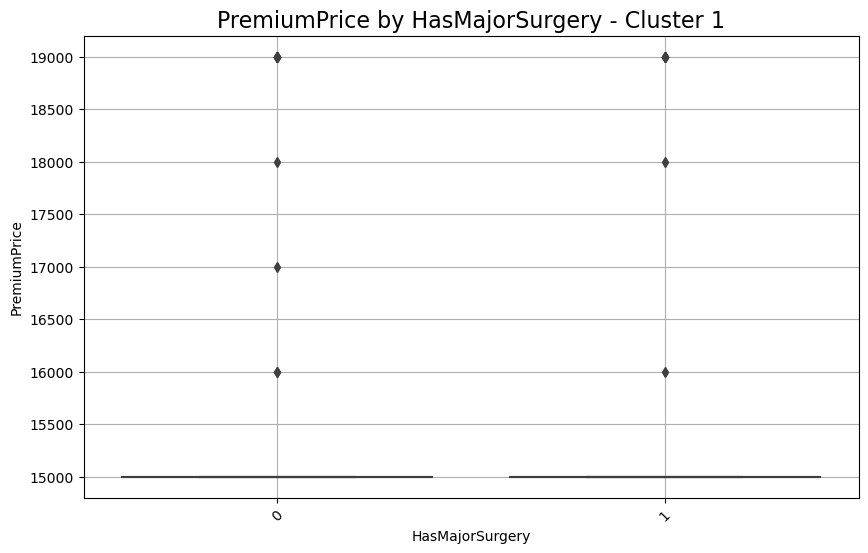

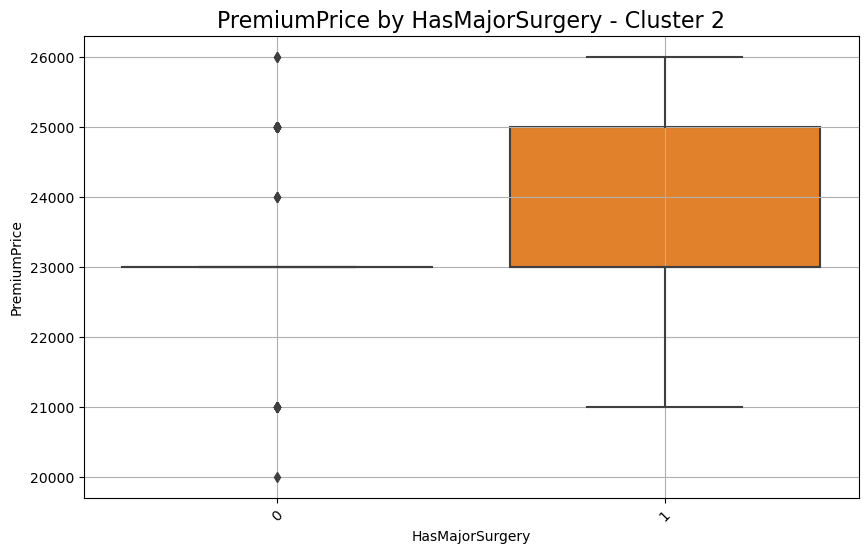

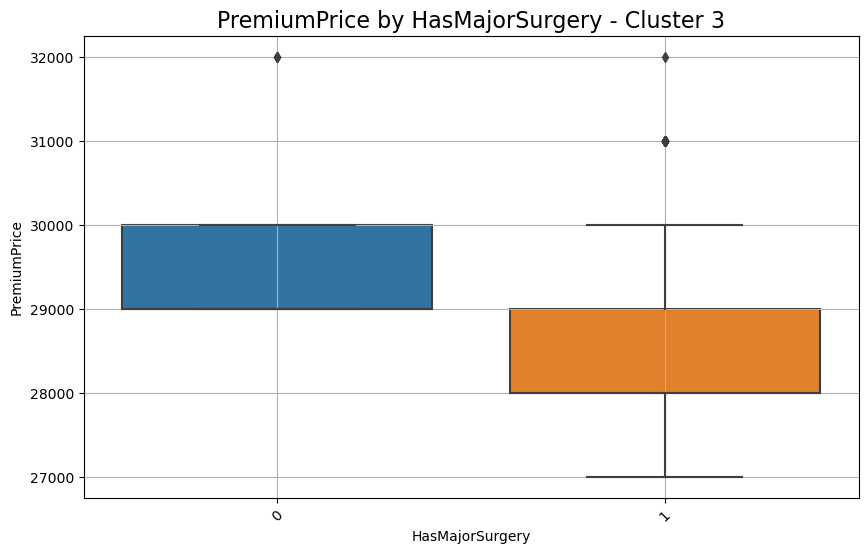

In [33]:
for cat_var in categorical_cols:
    for cluster in sorted(medical['Cluster'].unique()):
        cluster_data = medical[medical['Cluster'] == cluster]

        plt.figure(figsize=(10,6))
        sns.boxplot(data=cluster_data, x=cat_var, y='PremiumPrice')
        plt.title(f'PremiumPrice by {cat_var} - Cluster {cluster}', fontsize=16)
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

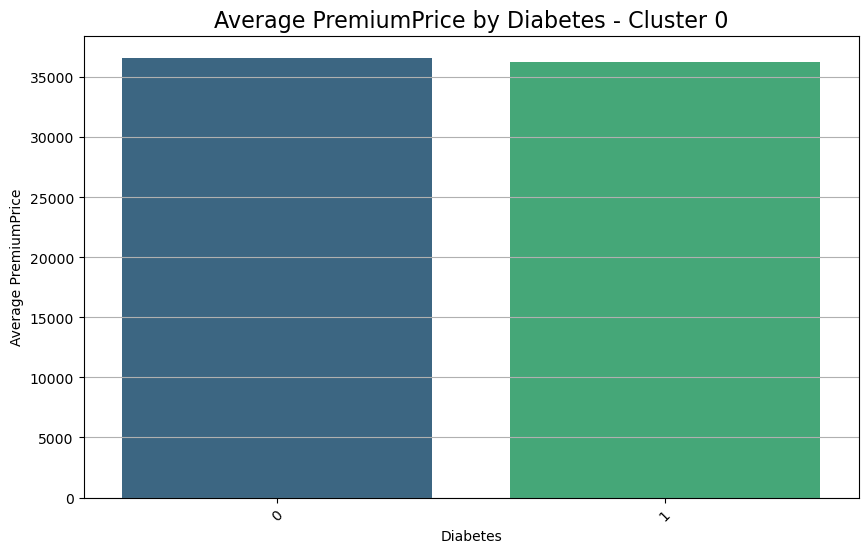

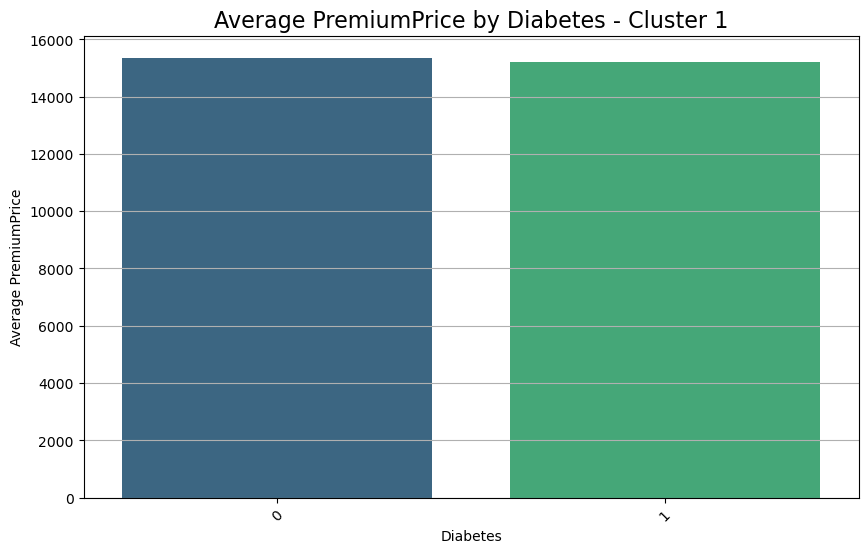

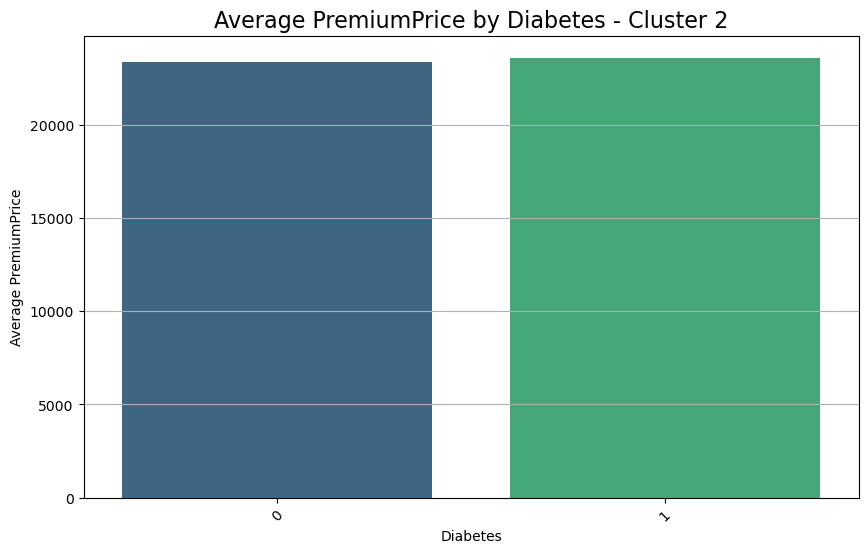

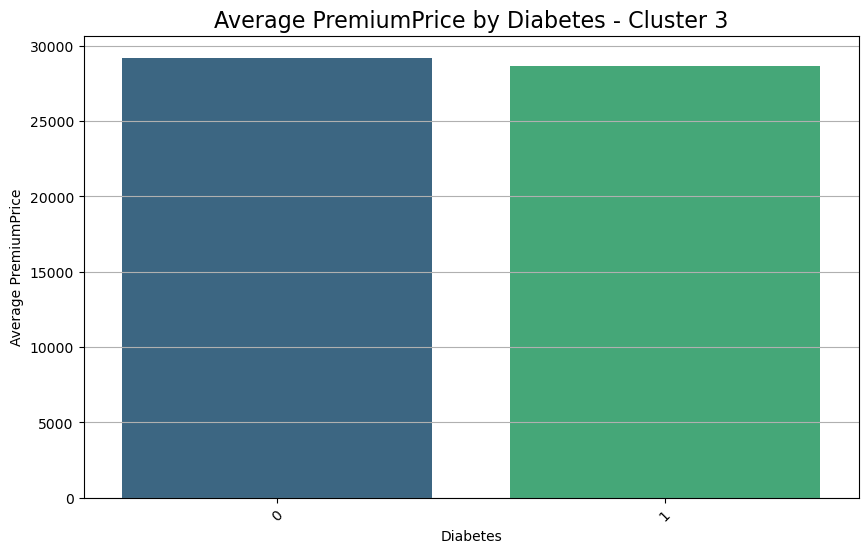

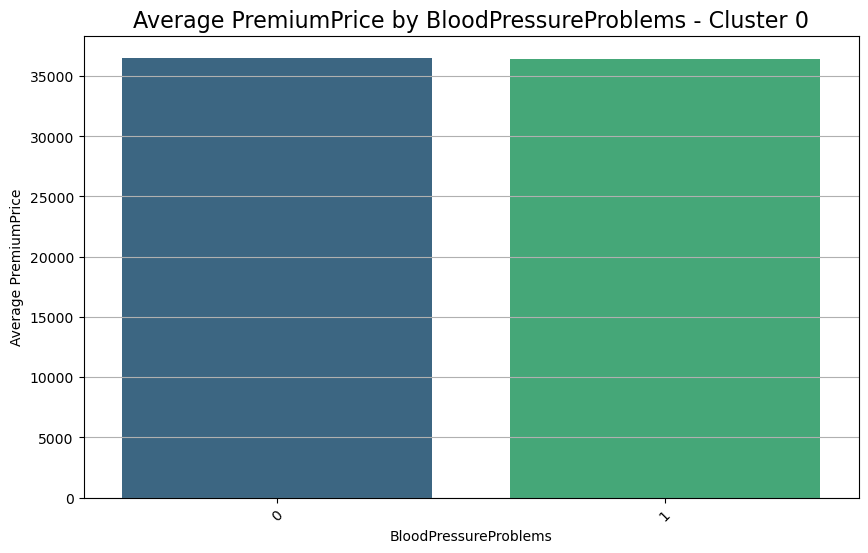

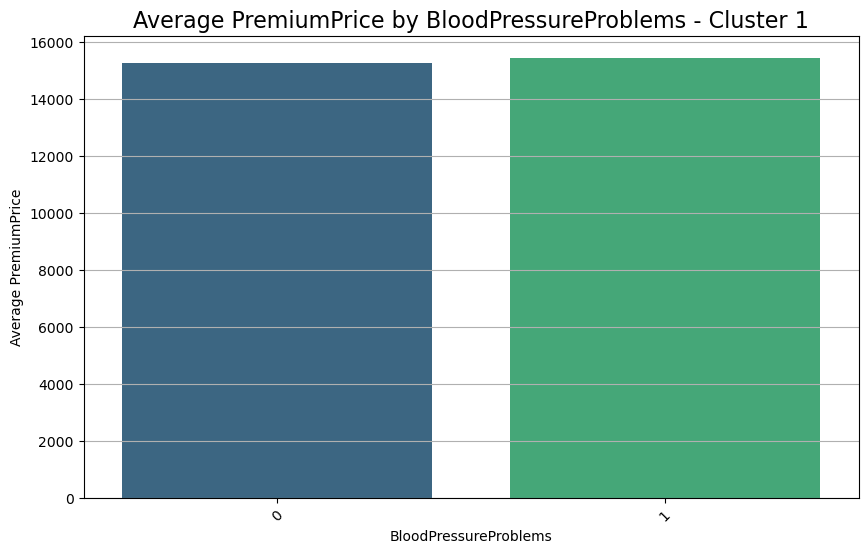

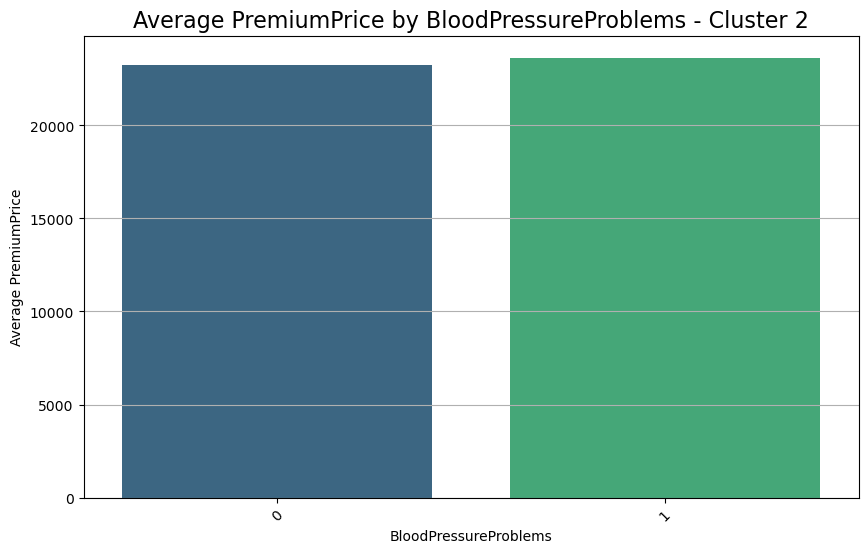

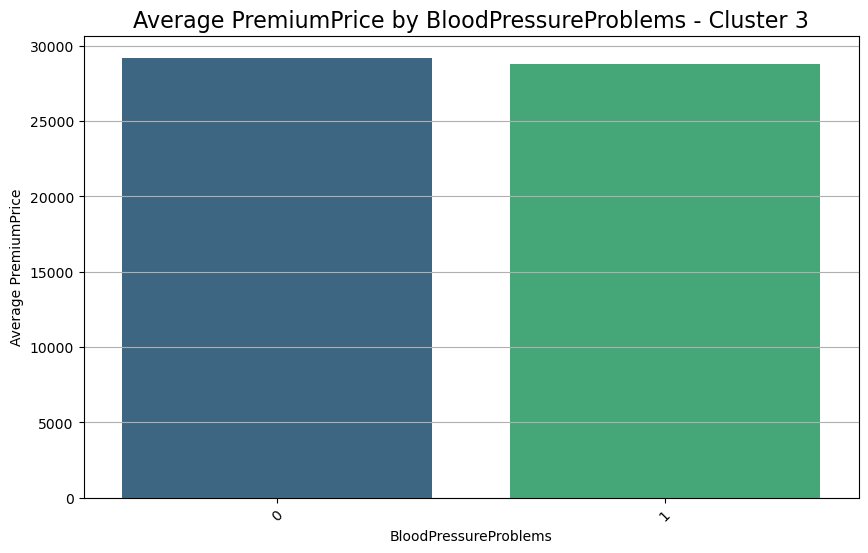

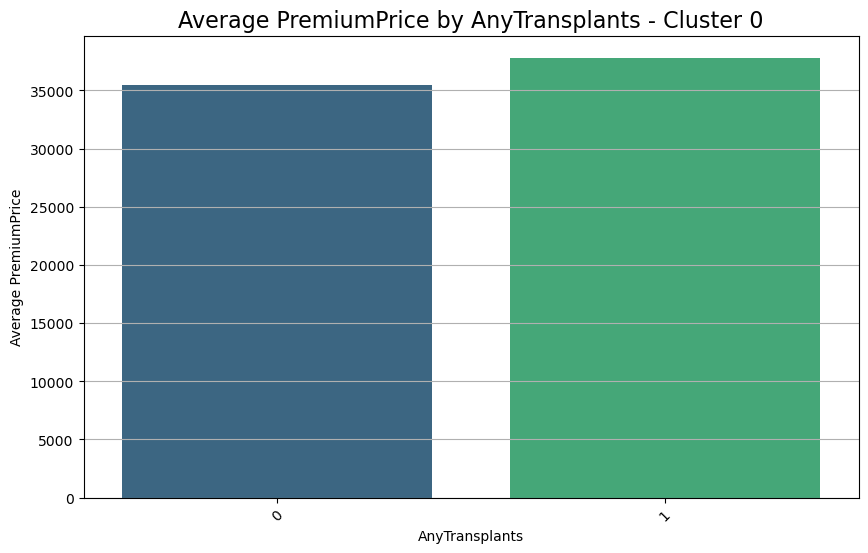

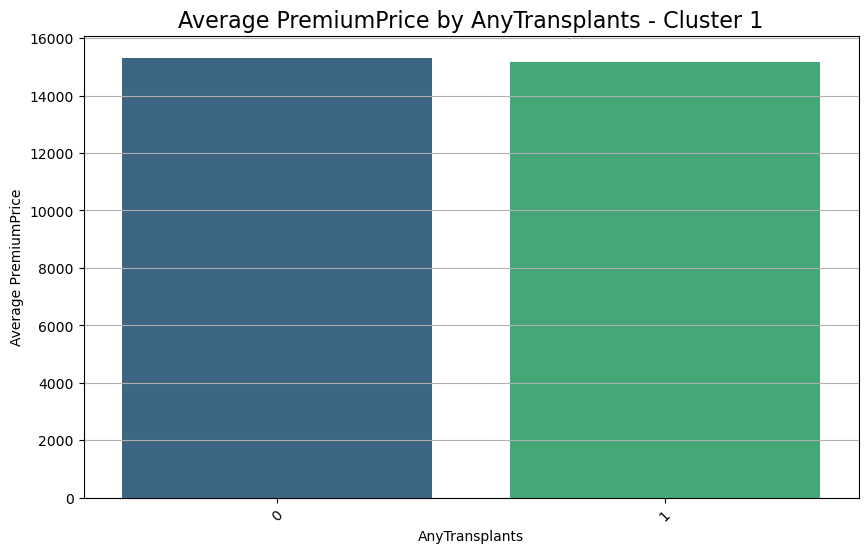

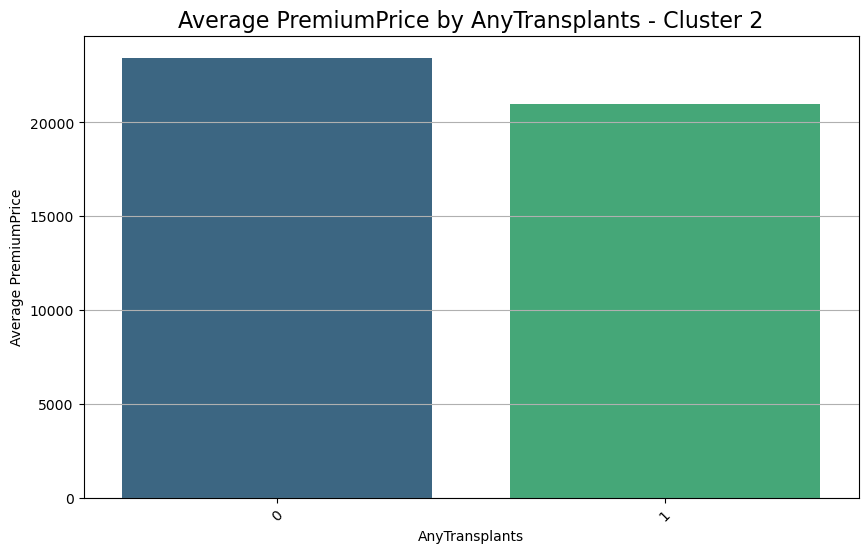

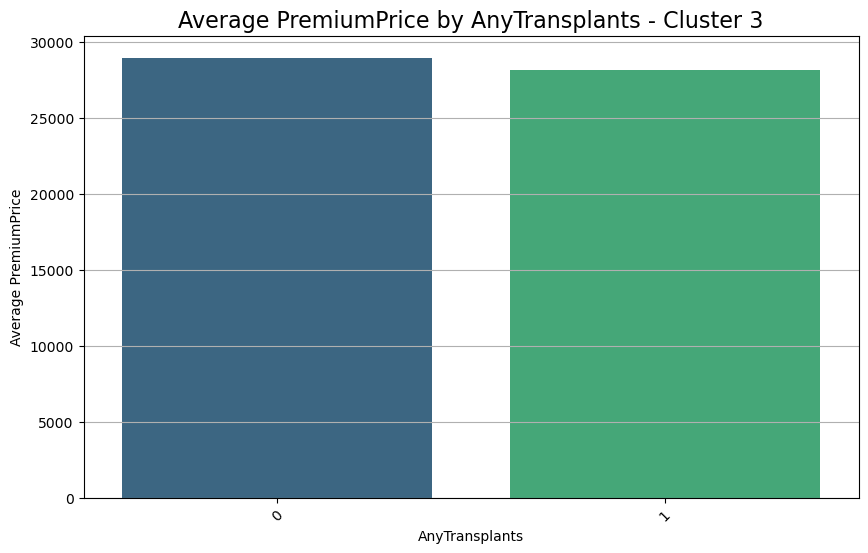

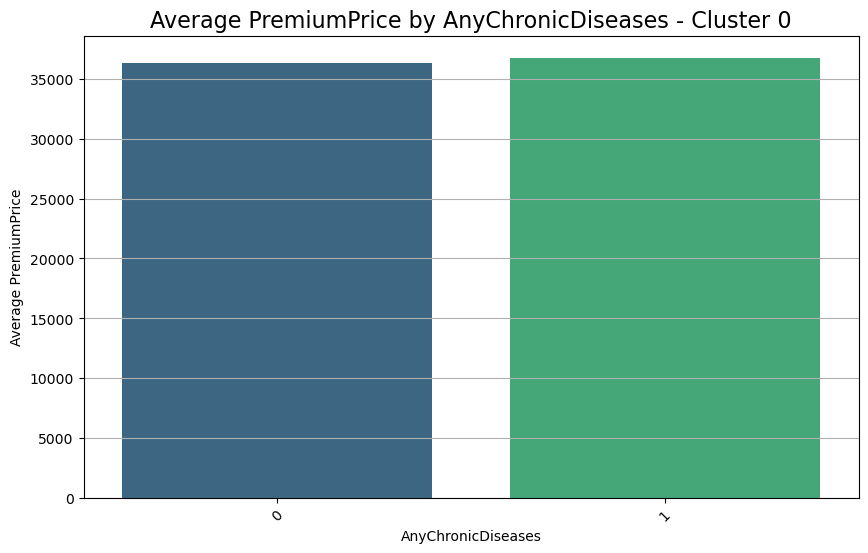

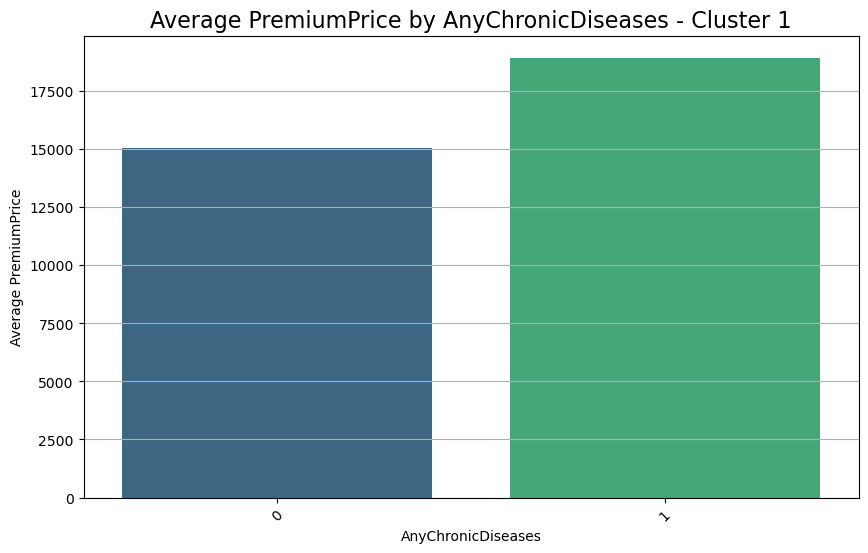

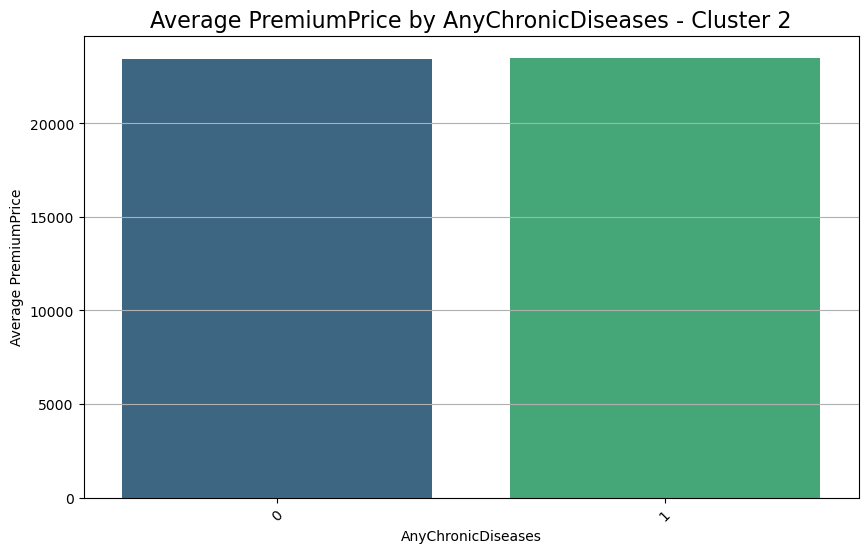

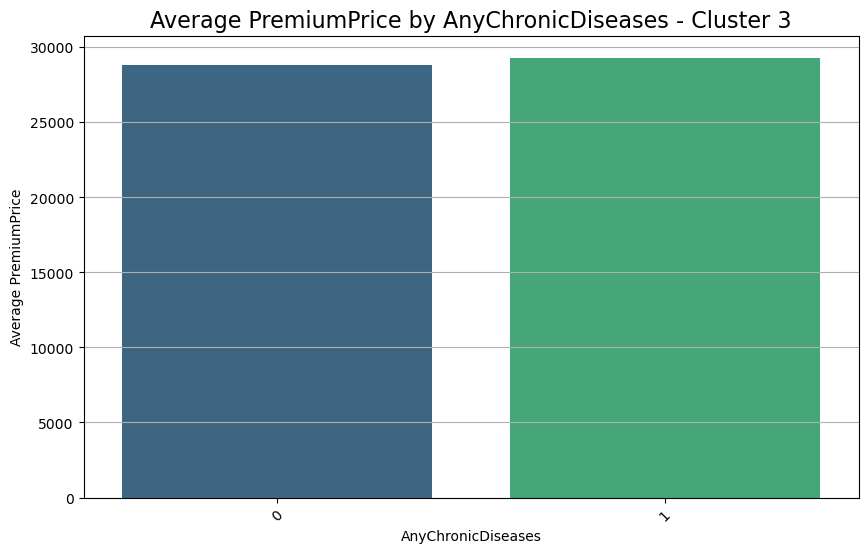

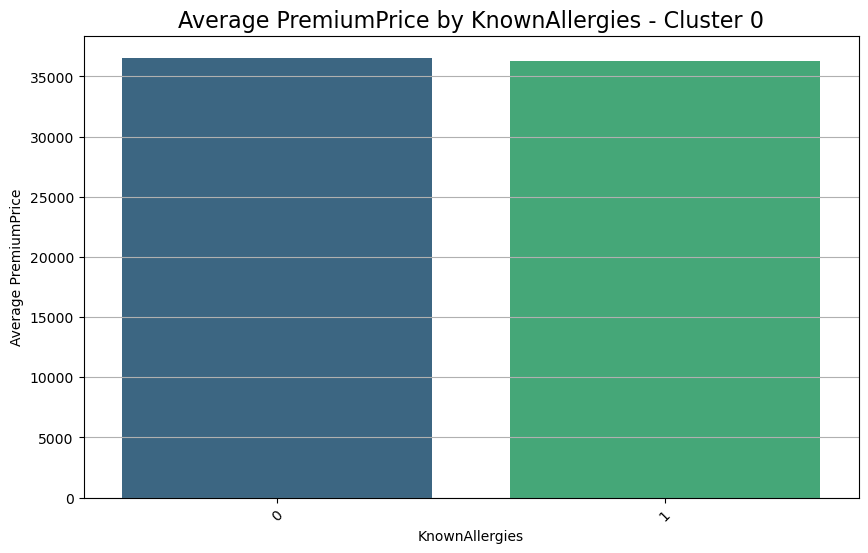

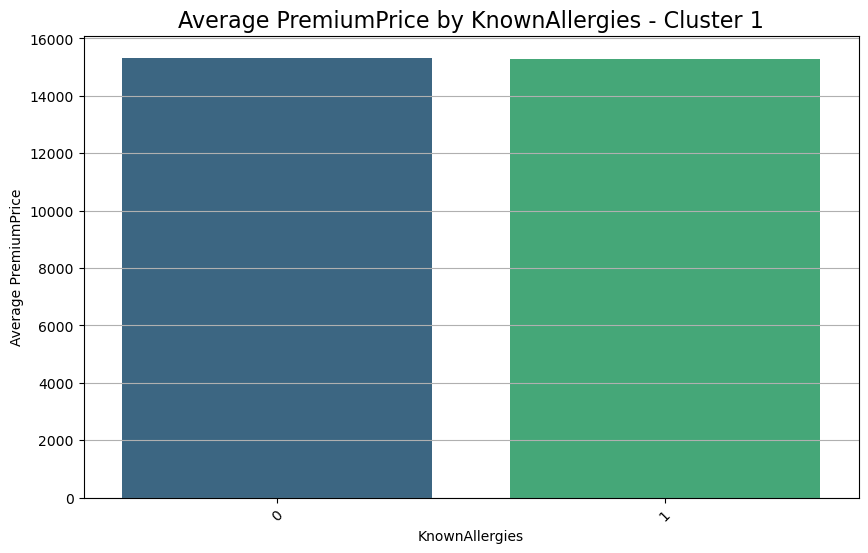

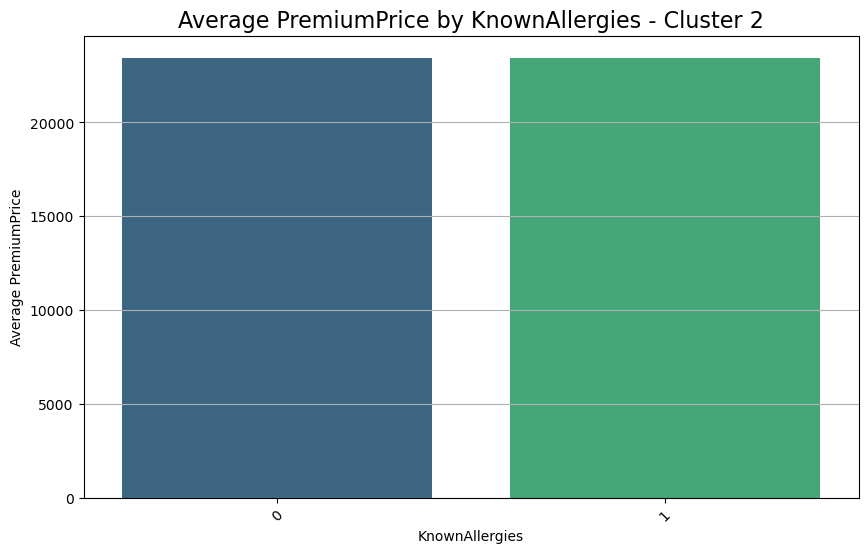

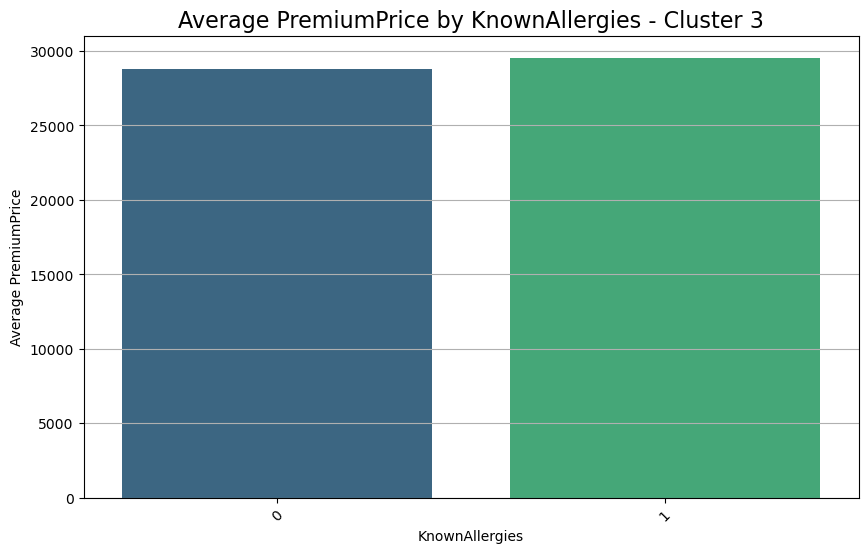

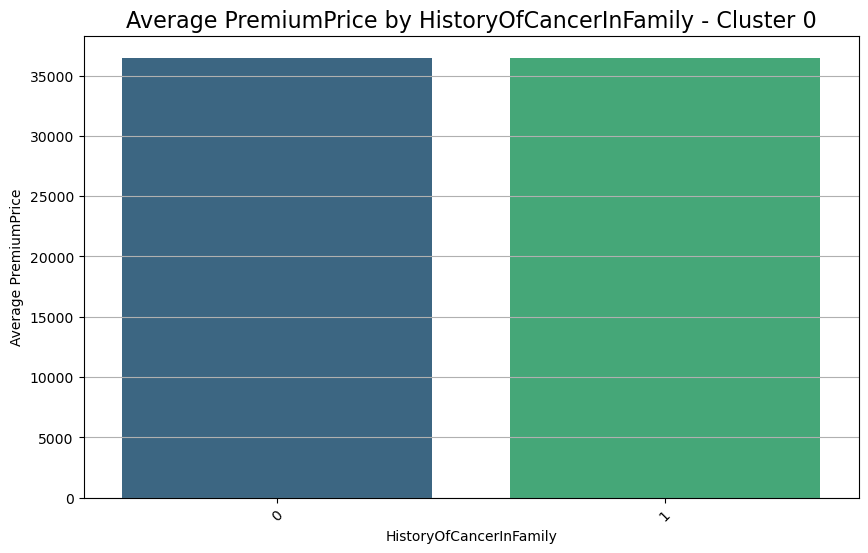

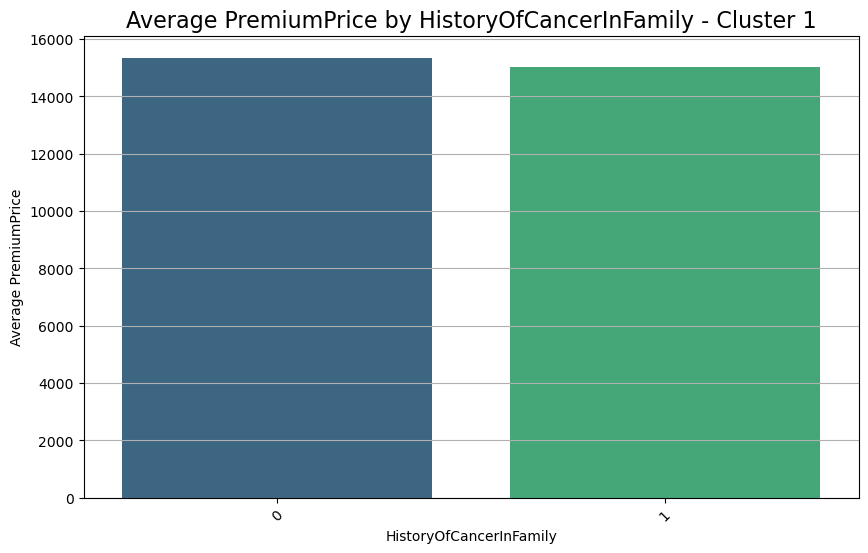

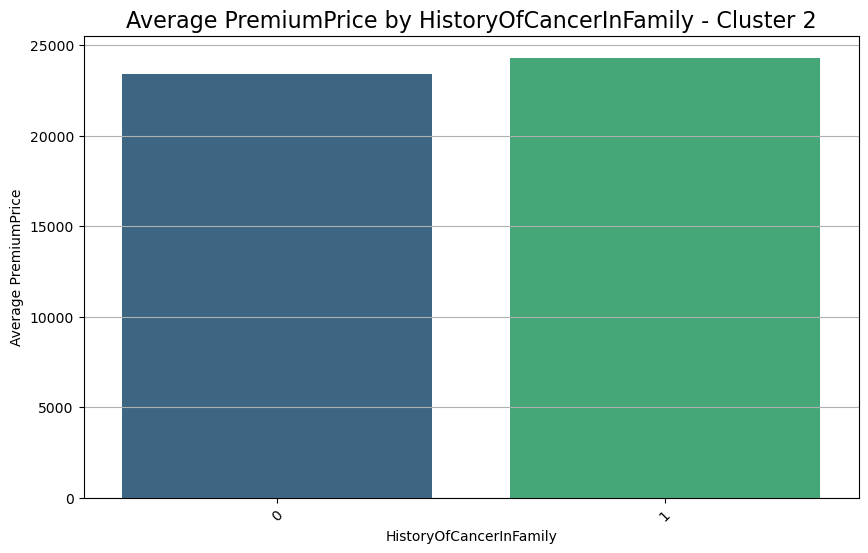

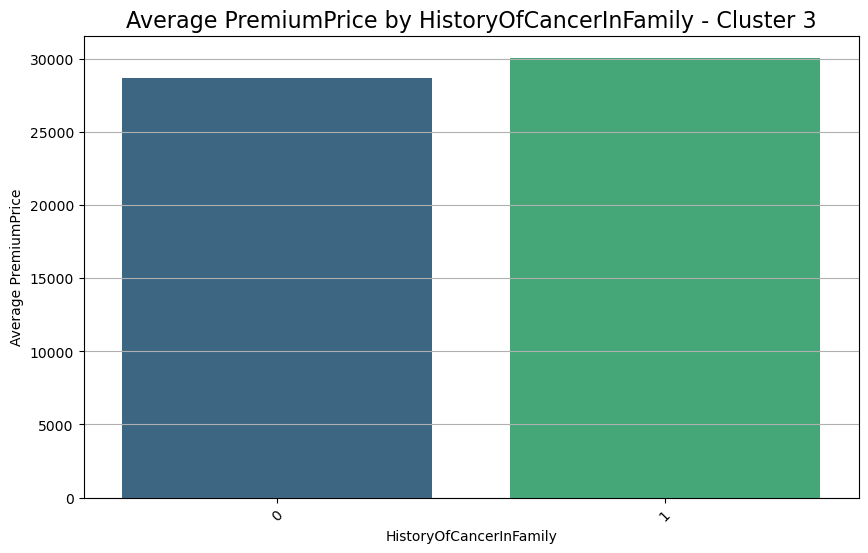

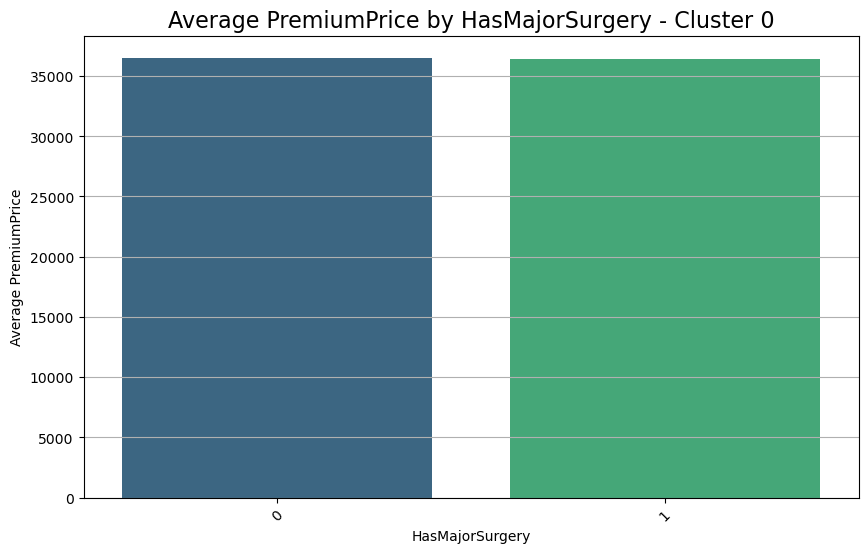

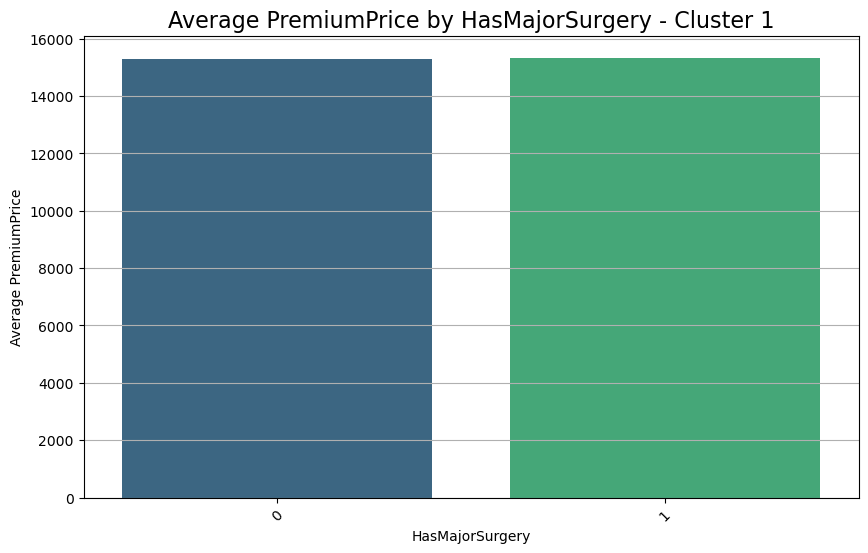

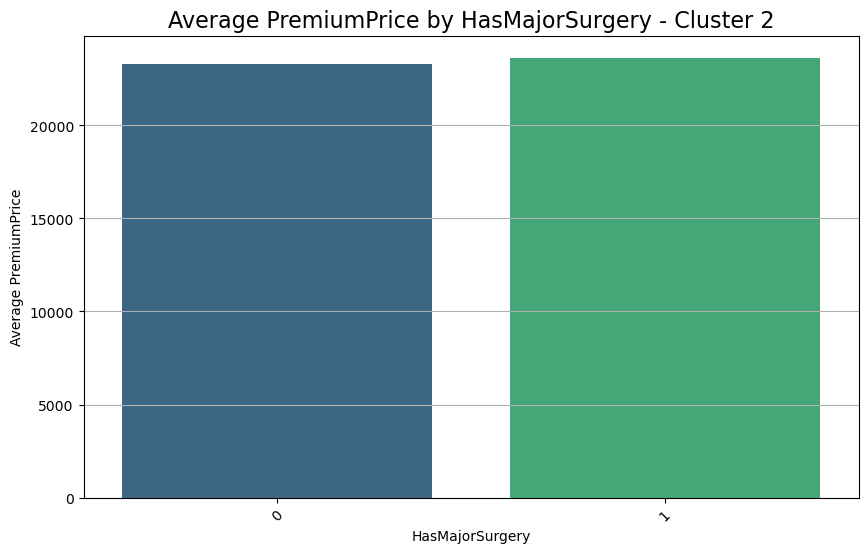

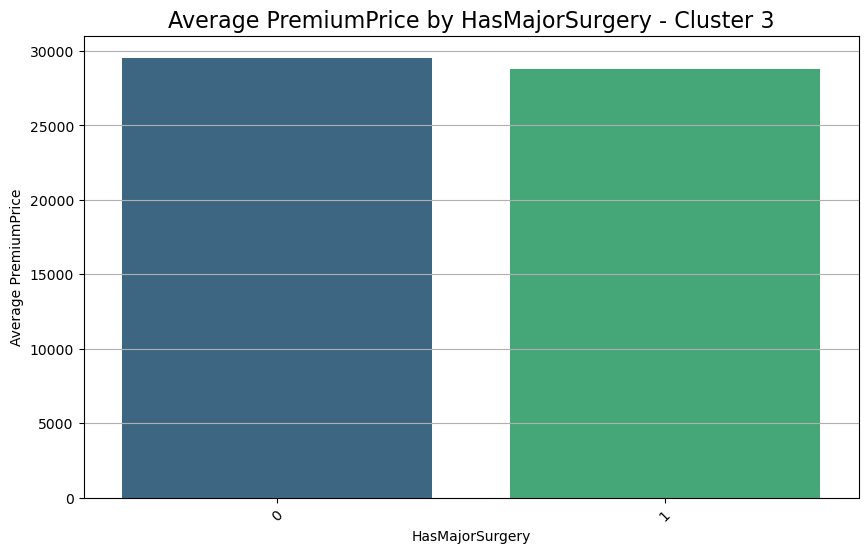

In [34]:
for cat_var in categorical_cols:
    for cluster in sorted(medical['Cluster'].unique()):
        cluster_data = medical[medical['Cluster'] == cluster]

        # Group by the categorical variable and calculate average PremiumPrice
        avg_premium = cluster_data.groupby(cat_var)['PremiumPrice'].mean().reset_index()

        # Sort by PremiumPrice if you want prettier plots
        avg_premium = avg_premium.sort_values('PremiumPrice', ascending=False)

        # Plot
        plt.figure(figsize=(10,6))
        sns.barplot(data=avg_premium, x=cat_var, y='PremiumPrice', palette='viridis')
        plt.title(f'Average PremiumPrice by {cat_var} - Cluster {cluster}', fontsize=16)
        plt.ylabel('Average PremiumPrice')
        plt.xticks(rotation=45)
        plt.grid(axis='y')
        plt.show()

The above analysis confirms how we might indeed have separate plan designs. However, we have not noticed a significant different between clusters 2 and 3, so we will be combining them into one plan design. We are also labelling the clusters 'Low', 'Moderate', and 'High', referring to the level of risk of its members. 
The clusters automatically grouped similar ages as Age is highly correlated with PremiumPrice, so we are creating the age bins anymore.

From the above conclusions, we are creating 3 subsets of the dataset for each plan design, so we can develop a different pricing strategy to acommodate the particularities of each plan design.

In [35]:
# Map cluster numbers to labels
cluster_map = {
    0: 'High',
    1: 'Low',
    2: 'Moderate',
    3: 'Moderate'
}

medical['PlanDesign'] = medical['Cluster'].map(cluster_map)

medical.head(10)

Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   
5   30         0                      0               0                   0   
6   33         0                      0               0                   0   
7   23         0                      0               0                   0   
8   48         1                      0               0                   0   
9   38         0                      0               0                   0   

   KnownAllergies  HistoryOfCancerInFamily  NumberOfMajorSurgeries  \
0               0                        0                       0   
1               0                        0                       0   
2               0                        0                       1   
3               0                        0                       2   
4               0                        0                       1   
5               1                        0                       1   
6               0                        0                       0   
7               1                        0                       0   
8               1                        0                       0   
9               0                        0                       0   

   PremiumPrice       BMI  HasMajorSurgery  Cluster PlanDesign  
0         25000  0.002373                0        2   Moderate  
1         29000  0.002253                0        3   Moderate  
2         23000  0.002363                1        2   Moderate  
3         28000  0.002777                1        3   Moderate  
4         23000  0.003193                1        2   Moderate  
5         23000  0.002695                1        2   Moderate  
6         21000  0.002400                0        2   Moderate  
7         15000  0.002411                0        1        Low  
8         23000  0.002591                0        2   Moderate  
9         23000  0.002808                0        2   Moderate

In [36]:
# Create subsets
medicalHigh = medical[medical['PlanDesign'] == 'High']
medicalLow = medical[medical['PlanDesign'] == 'Low']
medicalModerate = medical[medical['PlanDesign'] == 'Moderate']

# Dropping the Cluster and PlanDesign columns from subsets
cols_to_drop = ['Cluster', 'PlanDesign']

medicalHigh = medicalHigh.drop(columns=cols_to_drop)
medicalLow = medicalLow.drop(columns=cols_to_drop)
medicalModerate = medicalModerate.drop(columns=cols_to_drop)

medicalHigh.head(10)

Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
13    46         0                      1               0                   0   
24    53         0                      1               0                   0   
47    54         1                      0               0                   1   
73    25         1                      1               1                   1   
79    30         0                      0               1                   1   
86    46         0                      1               1                   0   
101   45         1                      0               1                   0   
125   31         1                      0               1                   0   
139   48         0                      1               1                   1   
147   59         0                      1               1                   0   

     KnownAllergies  HistoryOfCancerInFamily  NumberOfMajorSurgeries  \
13                0                        0                       0   
24                0                        1                       1   
47                0                        0                       0   
73                0                        0                       0   
79                0                        0                       0   
86                0                        1                       1   
101               0                        0                       0   
125               1                        0                       0   
139               0                        0                       0   
147               0                        0                       0   

     PremiumPrice       BMI  HasMajorSurgery  
13          35000  0.002865                0  
24          35000  0.004254                1  
47          35000  0.003171                0  
73          38000  0.002122                0  
79          38000  0.003157                0  
86          38000  0.004069                1  
101         38000  0.003939                0  
125         38000  0.002717                0  
139         38000  0.002034                0  
147         38000  0.003063                0

## Build and Evaluate ML Models Within Each Cluster

We build machine learning models within each cluster (High, Moderate, Low plan design) to better understand the drivers of premium pricing. This approach ensures our models are sensitive to the specific patterns and risks associated with each group.


In [45]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define reusable function to evaluate models
def evaluate_models(cluster_data, cluster_name):
    X = cluster_data.drop(columns=["PremiumPrice"])
    y = cluster_data["PremiumPrice"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(random_state=42)
    }

    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        results.append({"Model": name, "RMSE": rmse, "R² Score": r2})

    results_df = pd.DataFrame(results).sort_values(by="RMSE")
    print(f"\n Model Evaluation for {cluster_name} Plan\n")
    print(results_df)

    # Feature importance from Random Forest as example
    best_model = models["Random Forest"]
    importances = best_model.feature_importances_
    feature_names = X.columns

    importance_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")
    plt.title(f"Feature Importance ({cluster_name} Plan - Random Forest)")
    plt.tight_layout()
    plt.show()


### About the Model Evaluation Function

This function:
- Trains 3 models: Linear Regression, Random Forest, Gradient Boosting
- Calculates RMSE and R² for each model
- Identifies key feature importances from the Random Forest model
- Visualizes which features most impact the prediction

This provide a clear view of how drivers of medical premiums differ across plan types.



 Model Evaluation for High Plan

               Model         RMSE  R² Score
2  Gradient Boosting   895.165438  0.675656
1      Random Forest   936.570716  0.644957
0  Linear Regression  1217.380594  0.400137


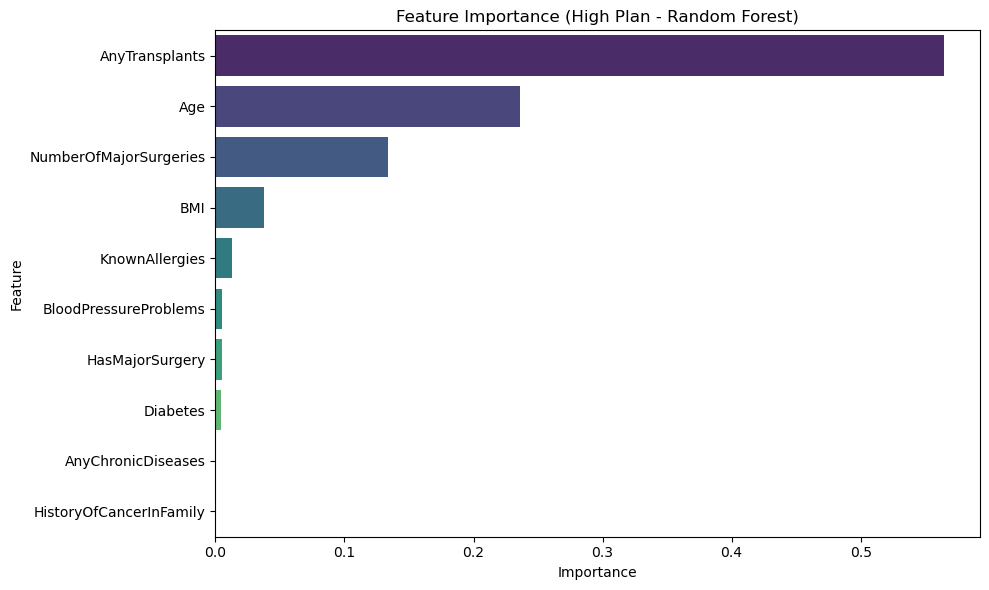


 Model Evaluation for Moderate Plan

               Model         RMSE  R² Score
2  Gradient Boosting  1770.478993  0.594538
1      Random Forest  1914.734661  0.525773
0  Linear Regression  2501.520568  0.190574


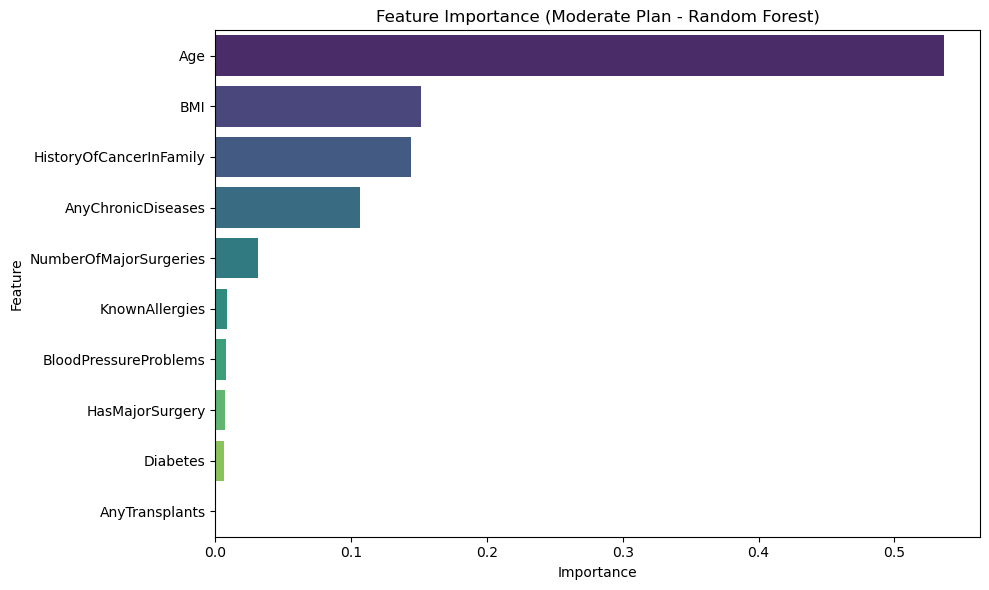


 Model Evaluation for Low Plan

               Model        RMSE  R² Score
1      Random Forest  121.536460  0.985309
0  Linear Regression  143.251045  0.979590
2  Gradient Boosting  192.055347  0.963314


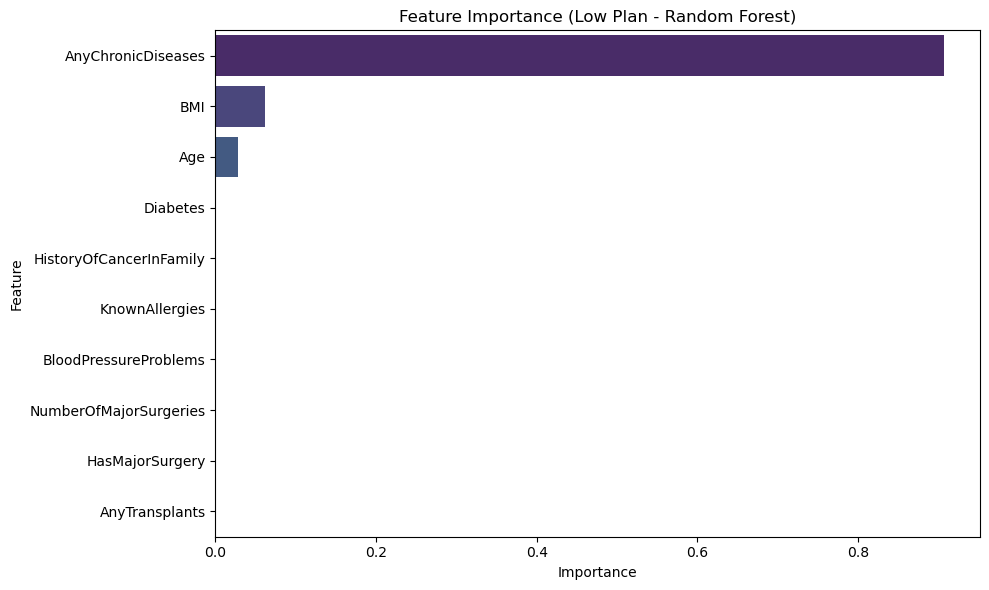

In [46]:
# Run model evaluations for each cluster group
evaluate_models(medicalHigh, "High")
evaluate_models(medicalModerate, "Moderate")
evaluate_models(medicalLow, "Low")


## Interpretation and Insights

Modeling within each plan cluster revealed important differences in both model performance and feature behavior:

### High Plan:
- **Gradient Boosting** performed the best with an RMSE of ~895 and R² of ~0.68, suggesting it captured complex interactions effectively.
- **Random Forest** was a close second, indicating that tree-based methods are well-suited for this segment.
- **Linear Regression** lagged behind, showing that linear assumptions do not fit the data well in higher-risk groups.

### Moderate Plan:
- Again, **Gradient Boosting** outperformed others with an RMSE of ~1770 and R² of ~0.59.
- **Random Forest** followed, slightly underperforming in comparison, but still significantly better than Linear Regression.
- The low R² for **Linear Regression** (~0.19) confirms that moderate-risk individuals exhibit nonlinear relationships affecting premium pricing.

### Low Plan:
- Surprisingly, all models performed exceptionally well.
- **Random Forest** was best with a very low RMSE of ~121 and R² of ~0.99 — nearly perfect predictions.
- Even **Linear Regression** had a strong fit (R² ~0.98), indicating that in low-risk groups, premium prices are more predictable and likely influenced by simpler, linear trends.

### Key Takeaways:
- **Gradient Boosting is the best overall model** for high and moderate plans due to its ability to capture nonlinear patterns.
- **Random Forest excels in the low-risk group**, offering top-tier accuracy with little error.
- Modeling by cluster yields more accurate, interpretable insights compared to a single model across the full dataset.


## Visualizing Model Performance by Cluster

To clearly compare the performance of machine learning models across clusters, we visualized:

- **RMSE (Root Mean Squared Error)** — measures the average prediction error. Lower values indicate better model accuracy.
- **R² Score (Coefficient of Determination)** — measures how well the model explains the variability in premium prices. Values closer to 1 indicate better explanatory power.

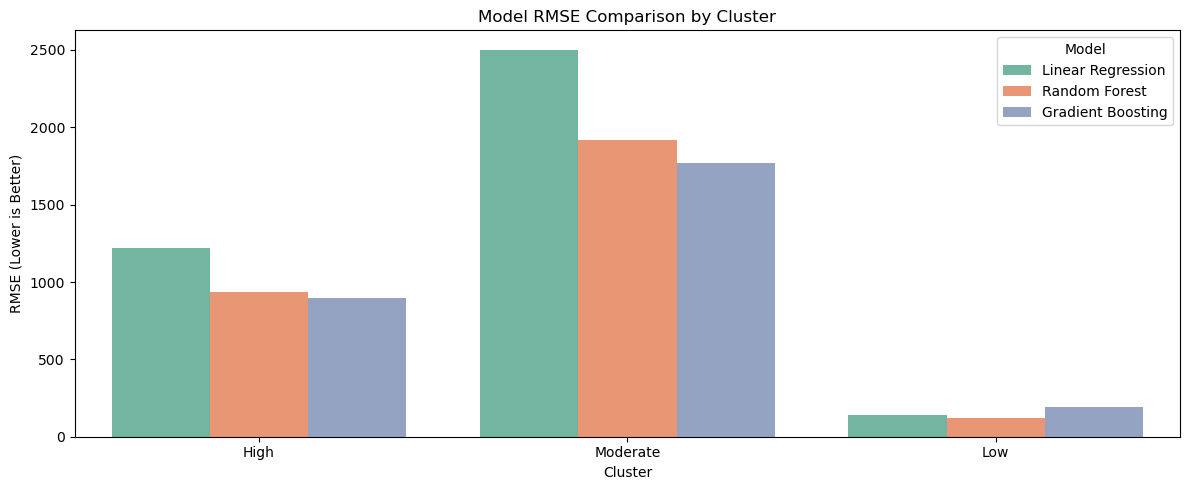

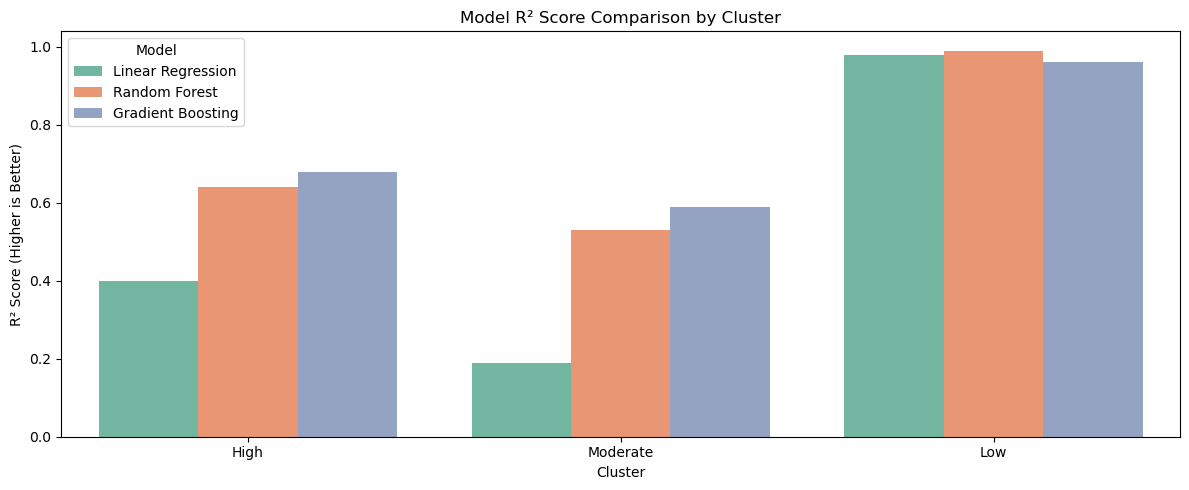

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data: performance results for all clusters and models
cluster_summary = pd.DataFrame({
    "Cluster": ["High", "High", "High", "Moderate", "Moderate", "Moderate", "Low", "Low", "Low"],
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting"] * 3,
    "RMSE": [1217.38, 936.57, 895.17, 2501.52, 1914.73, 1770.48, 143.25, 121.54, 192.06],
    "R² Score": [0.40, 0.64, 0.68, 0.19, 0.53, 0.59, 0.98, 0.99, 0.96]
})

# Plot 1: RMSE by Cluster
plt.figure(figsize=(12, 5))
sns.barplot(data=cluster_summary, x="Cluster", y="RMSE", hue="Model", palette="Set2")
plt.title("Model RMSE Comparison by Cluster")
plt.ylabel("RMSE (Lower is Better)")
plt.xlabel("Cluster")
plt.legend(title="Model")
plt.tight_layout()
plt.show()

# Plot 2: R² Score by Cluster
plt.figure(figsize=(12, 5))
sns.barplot(data=cluster_summary, x="Cluster", y="R² Score", hue="Model", palette="Set2")
plt.title("Model R² Score Comparison by Cluster")
plt.ylabel("R² Score (Higher is Better)")
plt.xlabel("Cluster")
plt.legend(title="Model")
plt.tight_layout()
plt.show()


### Plot Summary:
- In both the **High** and **Moderate** clusters, **Gradient Boosting** had the lowest RMSE and highest R², making it the most effective model.
- In the **Low** cluster, **Random Forest** outperformed all other models, achieving nearly perfect prediction performance.
- **Linear Regression** consistently underperformed, highlighting the importance of using ensemble methods for more complex or non-linear data patterns.

These plots help justify model selection for each cluster and demonstrate the effectiveness of cluster-based modeling.